# Advanced Regression Assignment - Upgrad (Surprise Housing)

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. The company wants to know:

- Which variables are significant in predicting the price of a house.
- How well those variables describe the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression.

### Steps Taken (table of content) :-

- Step 0 - Importing libraries
- Step 1 - Read data
- Step 2 - Understand Data
- Step 3 - Data visualization and exploration
- Step 4 - Missing value management
- Step 5 - Dummmy variable management
- Step 6 - Outlier treatment
- Step 7 - Manage data column
- Step 8 - Data split (Dependant and Independant variable)
- Step 9 - Split into test and train data
- Step 10 - Ridge regression model
- Step 11 - Lasso regression model
- Step 12 - Comparision of model based on step 8 & Step 9 (above two models)
- Step 13 - Findings on data based on above steps 


### Step 0 - Importing libraries

In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

### Step 1 - Read data

In [66]:
df = pd.read_csv("train.csv", keep_default_na=False)

### Step 2 - Understand Data

In [67]:
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [68]:
df.shape

(1460, 81)

In [69]:
# check for duplicate
df.duplicated().sum()

0

Looks like their are no duplicate values present

In [70]:
# replace na with none
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")

In [71]:
df.tail()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL          62     7917   Pave  None      Reg   
1456  1457          20       RL          85    13175   Pave  None      Reg   
1457  1458          70       RL          66     9042   Pave  None      Reg   
1458  1459          20       RL          68     9717   Pave  None      Reg   
1459  1460          20       RL          75     9937   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1455          0        TA        TA      PConc       Gd       TA           No   
1456        119        TA        TA     CBlock       Gd       TA           No   
1457          0        Ex        Gd      Stone       TA       Gd           No   
1458          0        TA        TA     CBlock       TA       TA           Mn   
1459          0        Gd        TA     CBlock       TA       TA           No   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
1455          953    GasA        Ex          Y      SBrkr       953       694   
1456         1542    GasA        TA          Y      SBrkr      2073         0   
1457         1152    GasA        Ex          Y      SBrkr      1188      1152   
1458         1078    GasA        Gd          Y      FuseA      1078         0   
1459         1256    GasA        Gd          Y      SBrkr      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1455             0       1647             0             0         2         1   
1456             0       2073             1             0         2         0   
1457             0       2340             0             0         2         0   
1458             0       1078             1             0         1         0   
1459             0       1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1455             3             1          TA             7        Typ   
1456             3             1          TA             7       Min1   
1457             4             1          Gd             9        Typ   
1458        

In [72]:
# check data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

Their are two data types object and int64. Also, some are having wrongly assigned datatype, which needs to be fixed based on the data description shared

In [73]:
# convert to object type
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [74]:
# convert to numeric (float 64) type
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

Have successfully converted the dtype

In [76]:
df.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.00

Looks like their are skewed distributions present due to difference in mean and median

### Step 3 - Missing value management

In [77]:
# check if any null values present
df.isna().values.any()

True

In [78]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

LotFrontage      259

MasVnrArea         8

these two have na values present

In [79]:
# replace the missing values by mean value as both are numerical columns
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [80]:
df.isna().values.any()

False

### Step 4 - Data visualization and exploration

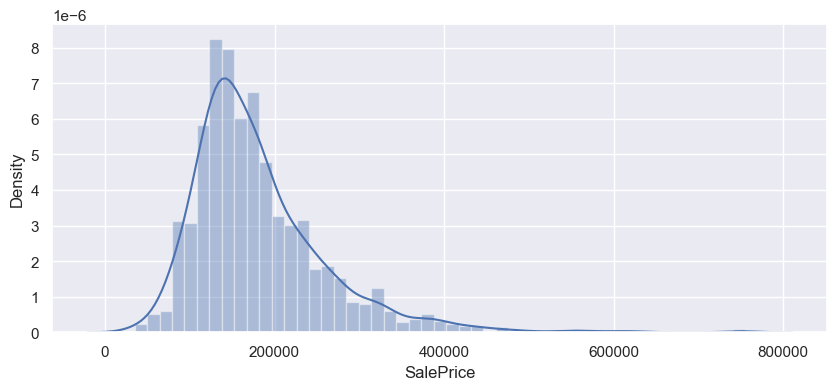

In [81]:
# univariate analysis - target variable is saleprice
width = 10
height = 4
sns.set(rc = {'figure.figsize':(width,height)})
sns.distplot(df['SalePrice']);

In [82]:
## Check the skewness of saleprice
df['SalePrice'].skew()

1.8828757597682129

saleprice is skewed

In [83]:
df['SalePrice'].kurt()

6.536281860064529

since it's greater than 1 hence distribution of saleprice is peaked. We need to transform (log)

In [84]:
df['SalePrice'] = np.log(df['SalePrice'])

In [85]:
df_skew = df['SalePrice'].skew()
df_kurt = df['SalePrice'].kurt()

print("skew after transform", df_skew)
print("kurt after transform", df_kurt)

skew after transform 0.12133506220520406
kurt after transform 0.8095319958036296


Normally distributed after transform as value for kurt and skew is less than 1

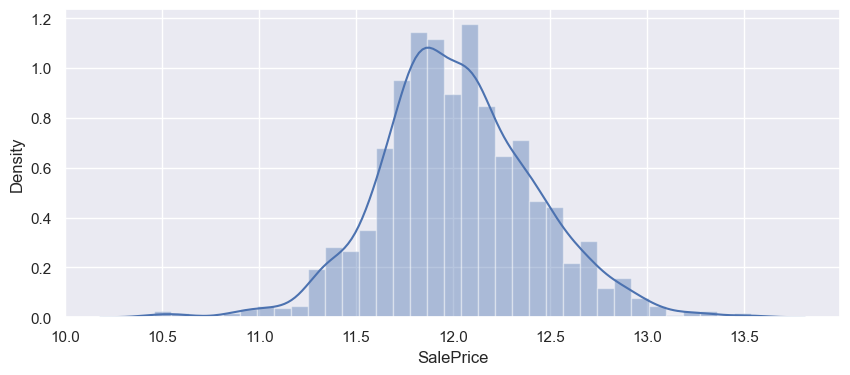

In [86]:
# let's check this visually
width = 10
height = 4
sns.set(rc = {'figure.figsize':(width,height)})
sns.distplot(df['SalePrice']);

#### divide the dataframe (df) into catergorical and numerical

In [87]:
# categorical 
df_cat = df.select_dtypes(include='object')
df_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageYrBlt GarageFinish  \
0          Gd        Typ        None     Attchd        2003          RFn   
1          TA        Typ          TA     Attchd        1976          RFn   
2          Gd        Typ          TA     Attchd        2001          RFn   
3          Gd        Typ          Gd     Detchd        1998          Unf   
4          Gd        Typ          TA     Attchd        2000          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType  \
0         TA         TA          Y   None  None        None       WD   
1         TA         TA          Y   None  None        None       WD   
2         TA         TA          Y   None  None        None       WD   
3         TA         TA          Y   None  None        None       WD   
4         TA         TA          Y   None  None        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [88]:
# numerical 
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()



Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247694  
1       5    2007  12.109011  
2       9    2008  12.317167  
3       2    2006  11.849398  
4      12    2008  12.429216

#### EDA (categorical & numerical)

In [89]:
# categorical

for col in df_cat.columns:
    print(col)
    print(df[col].unique(), '\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
['Gab

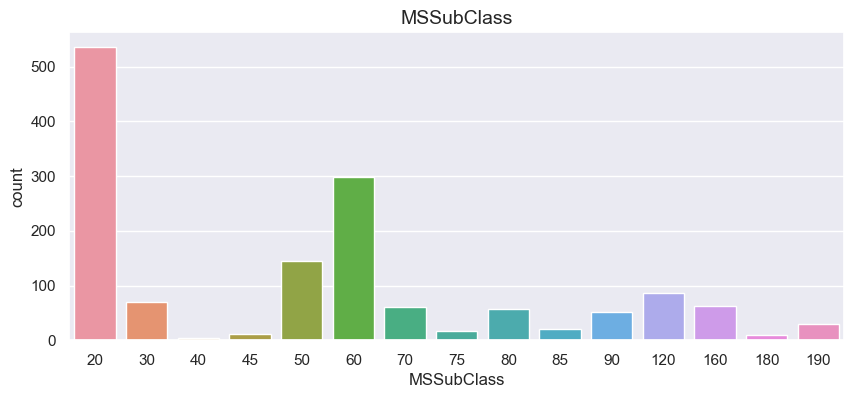

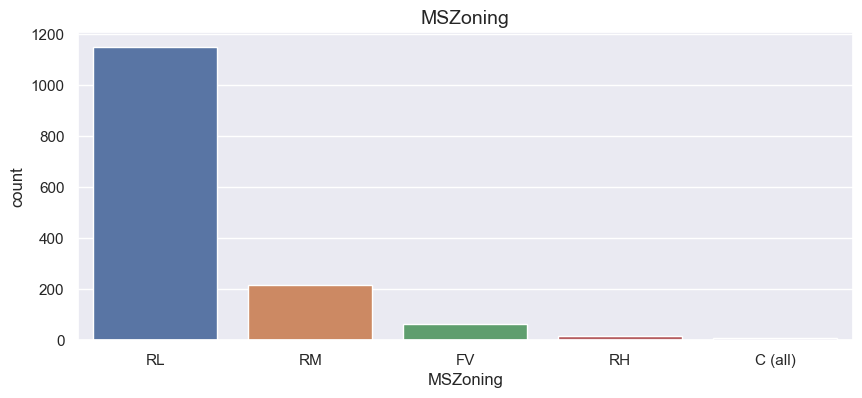

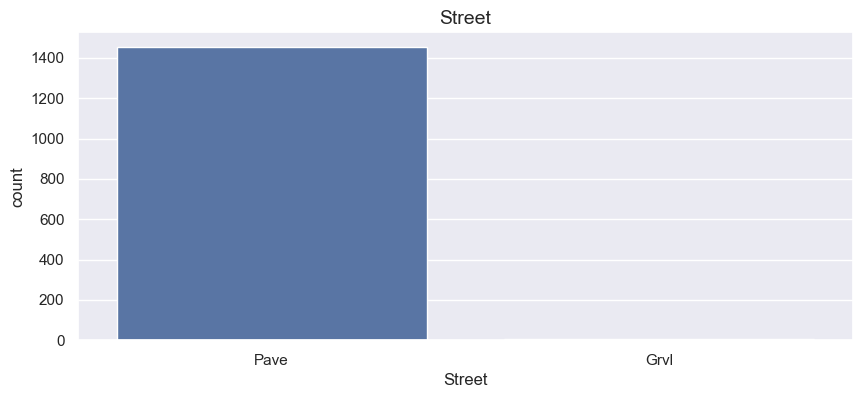

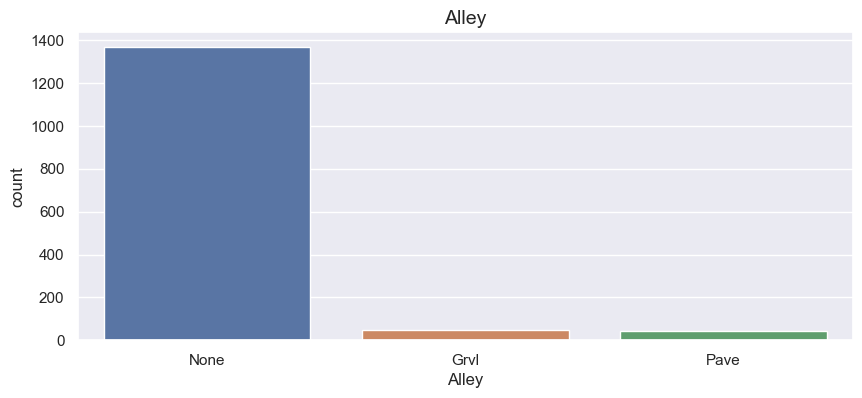

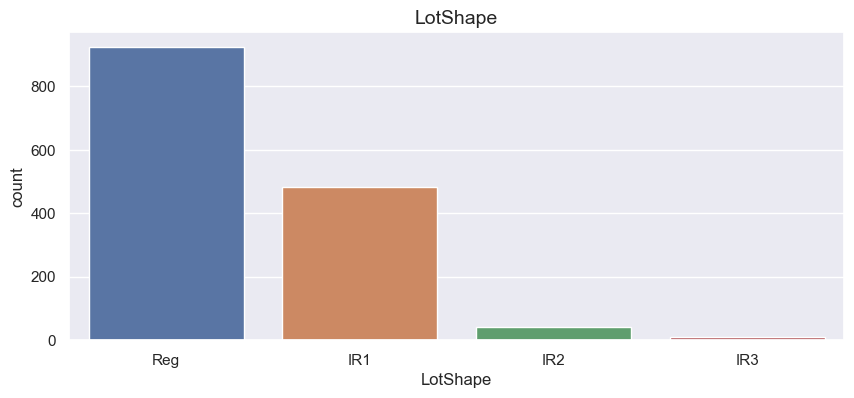

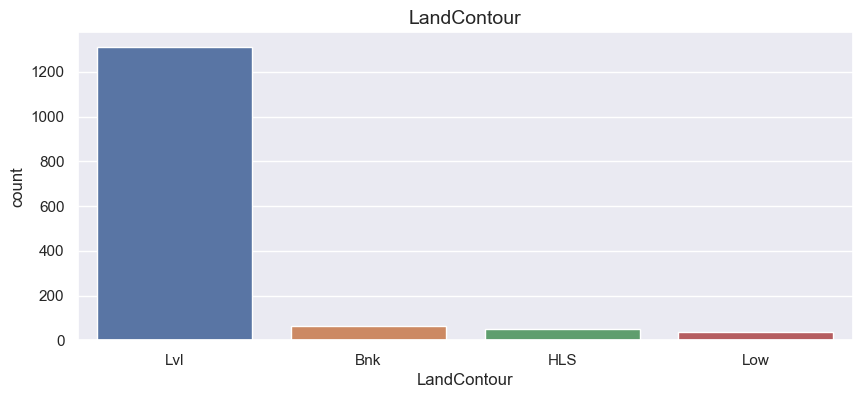

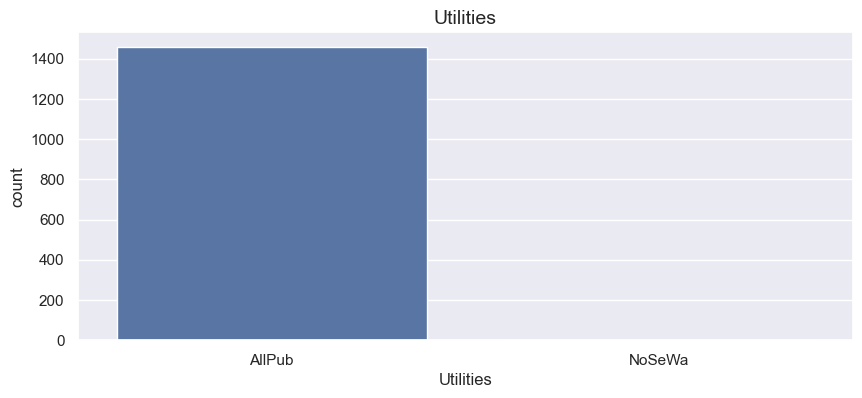

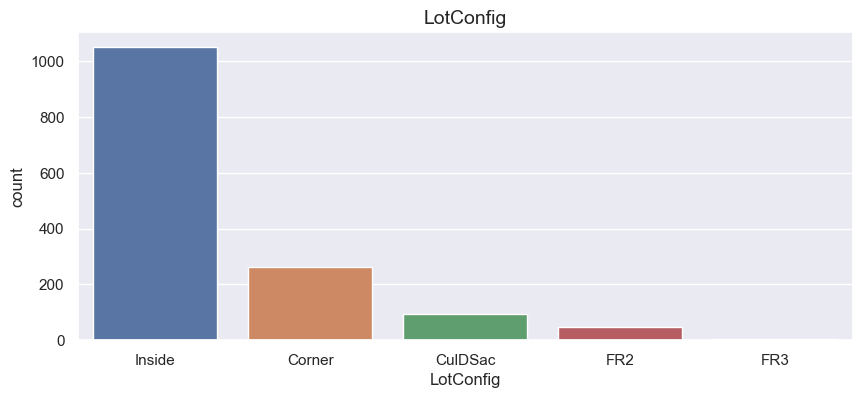

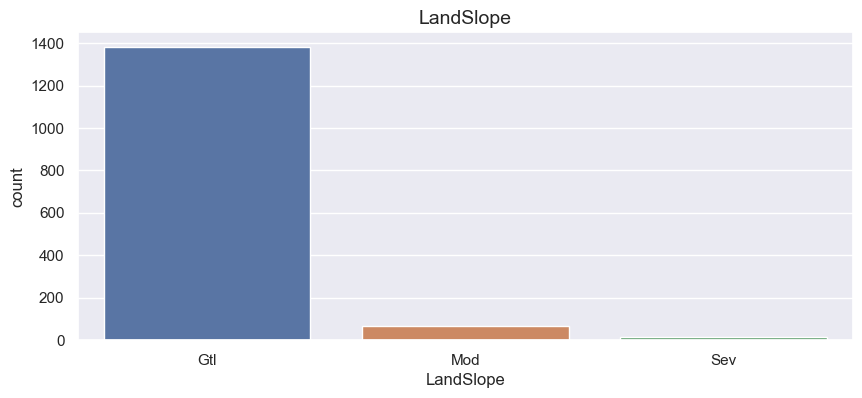

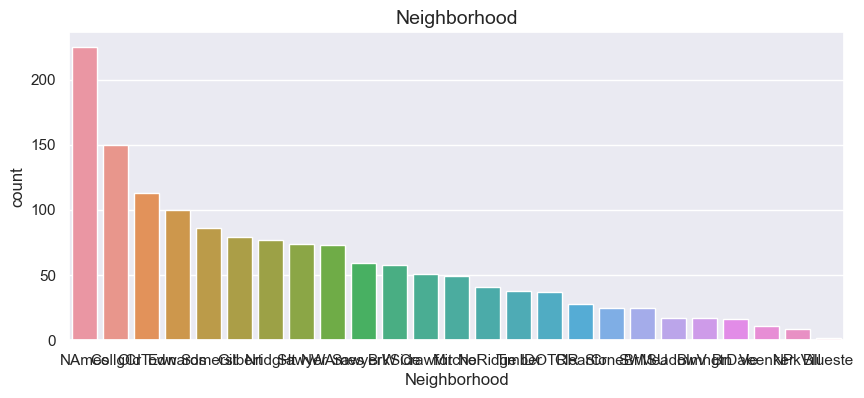

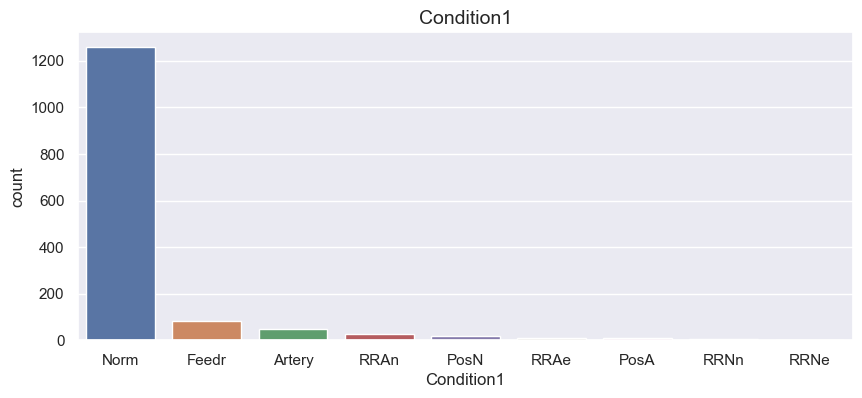

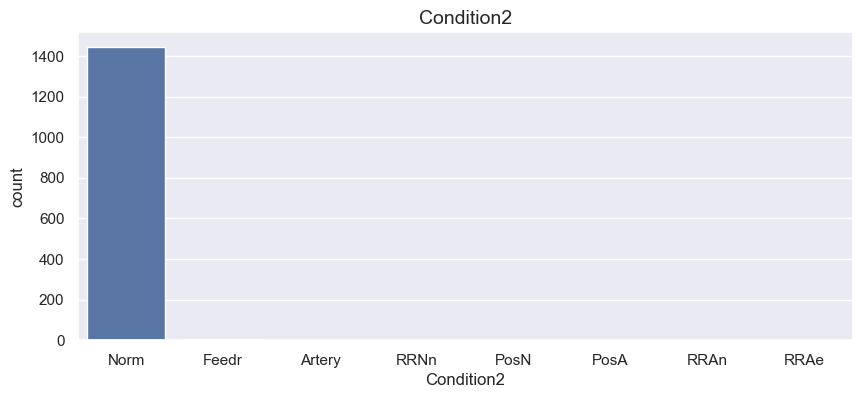

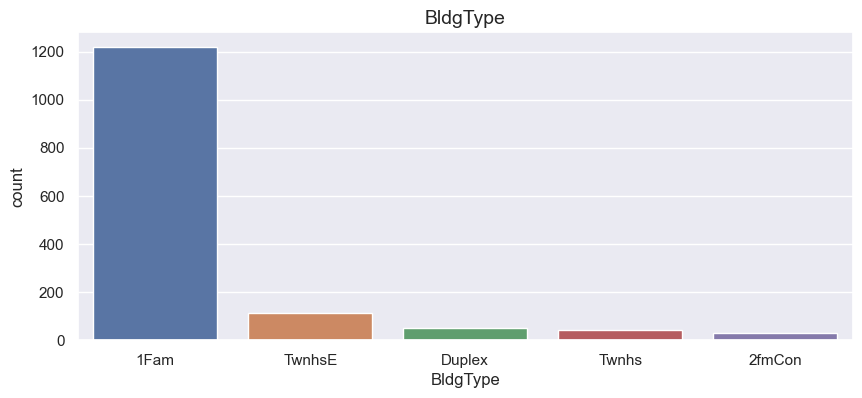

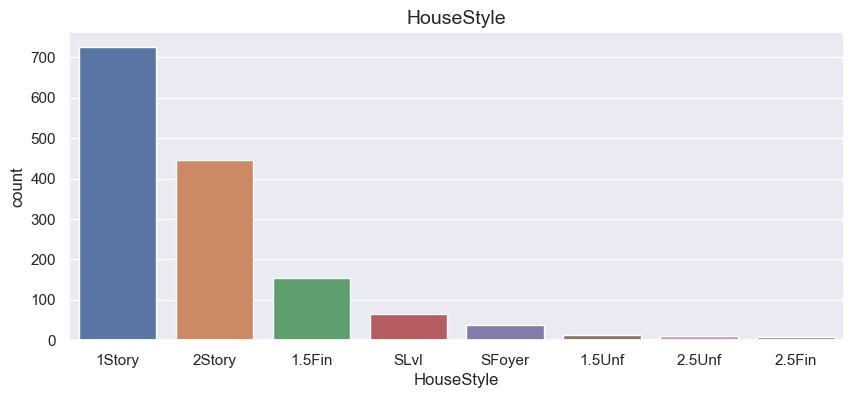

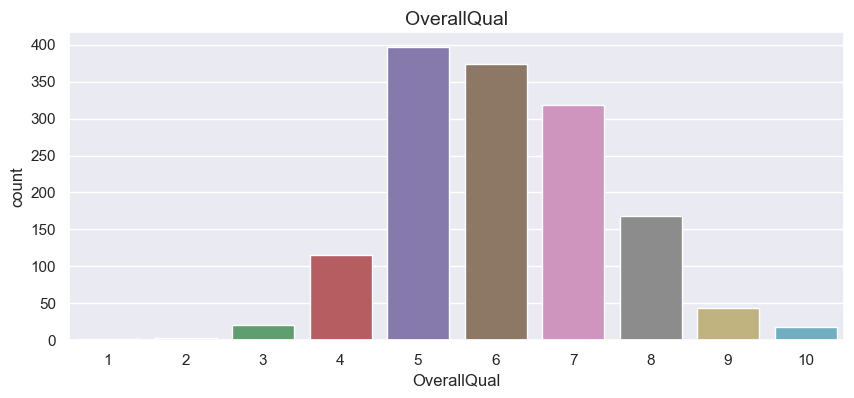

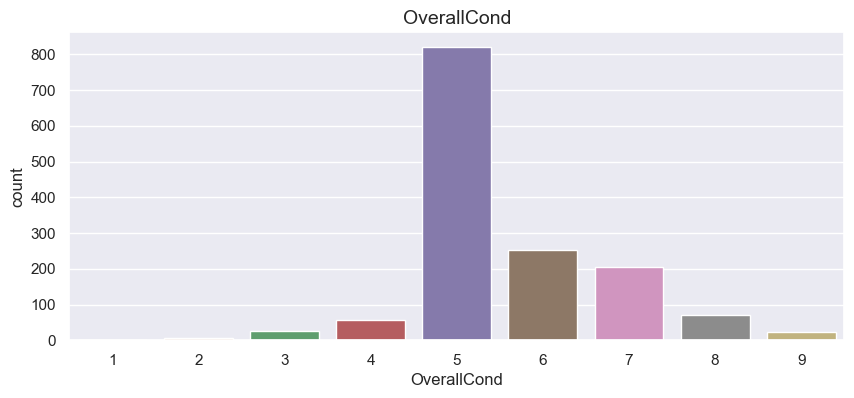

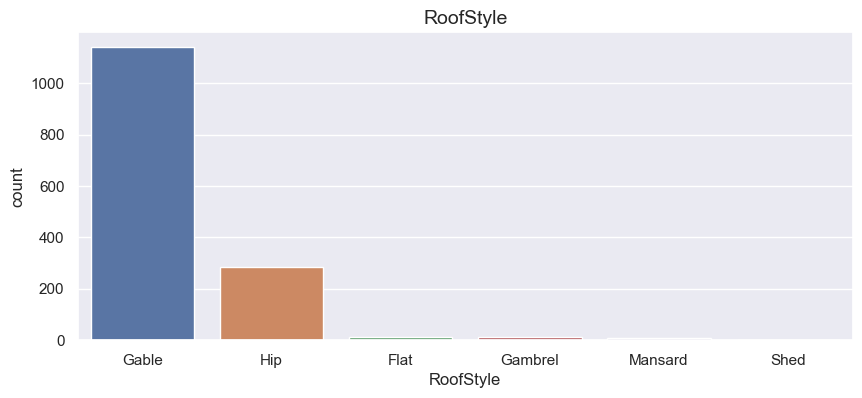

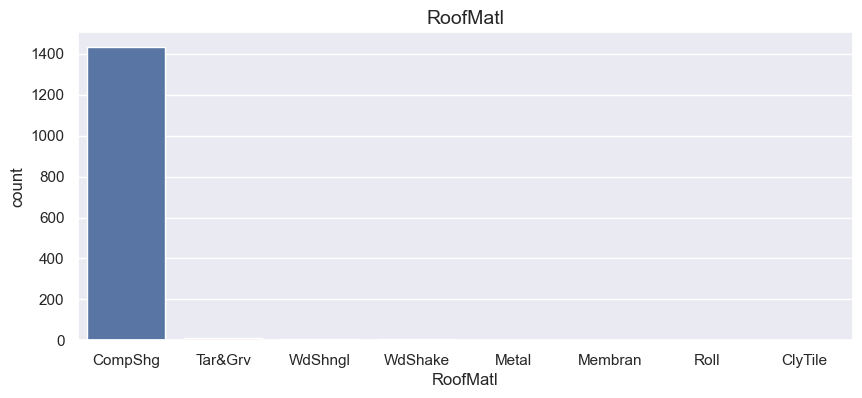

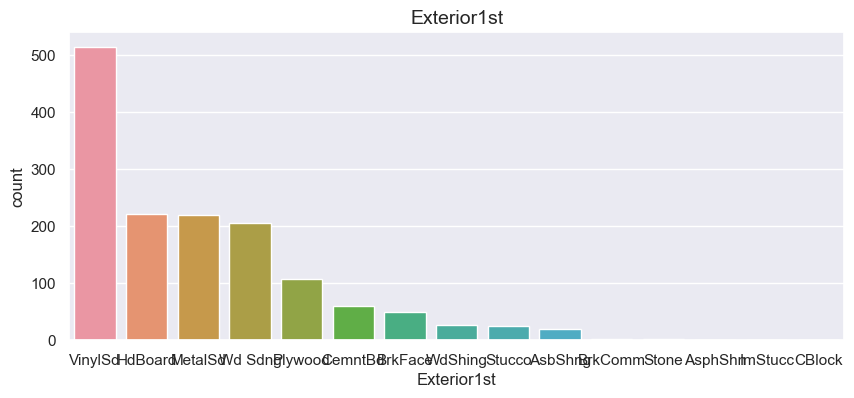

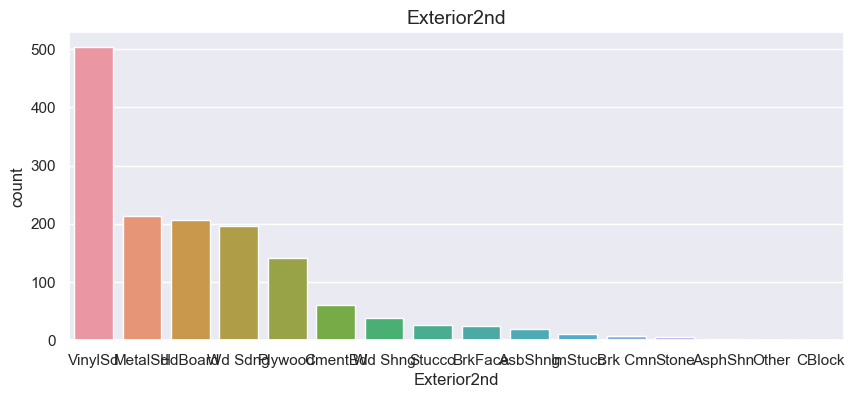

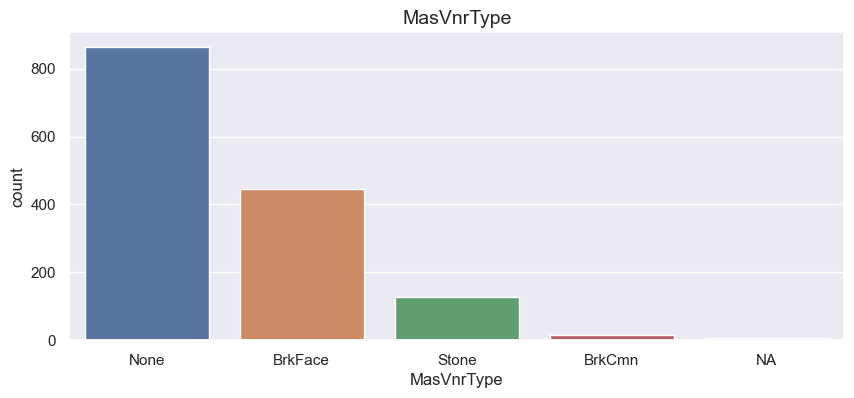

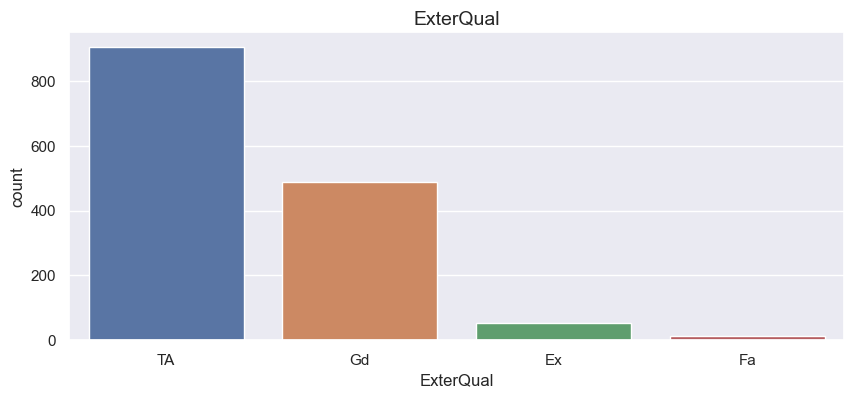

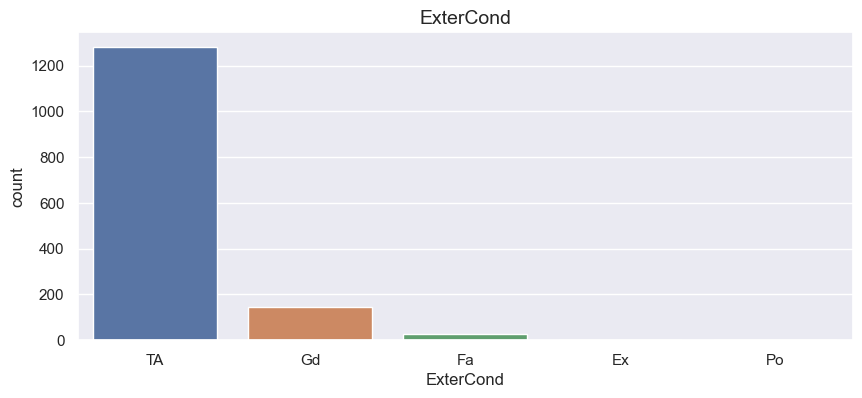

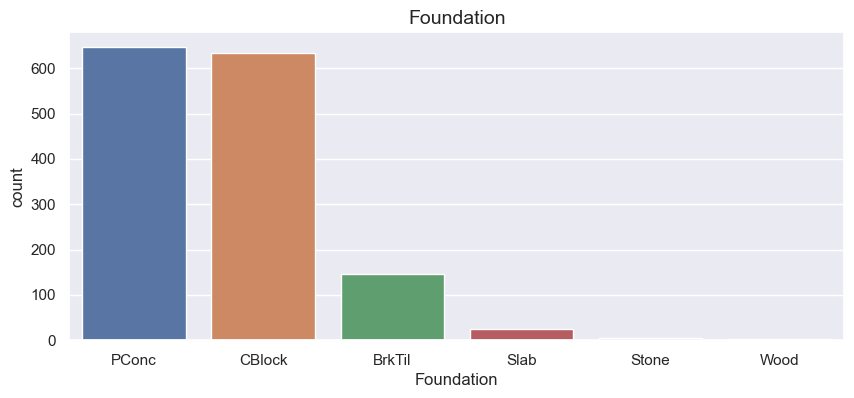

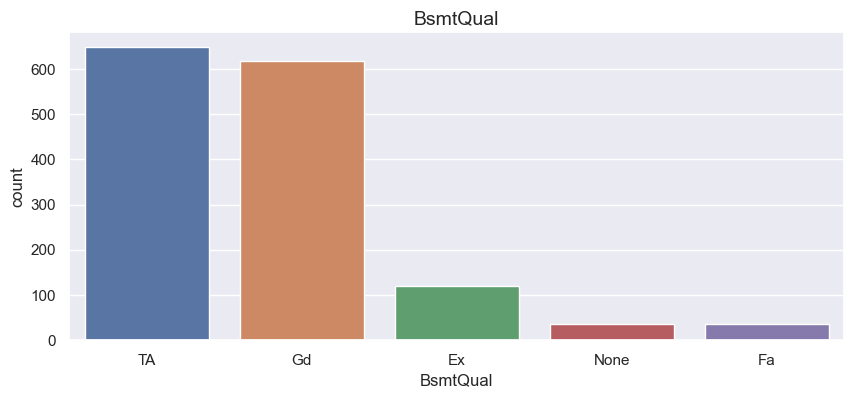

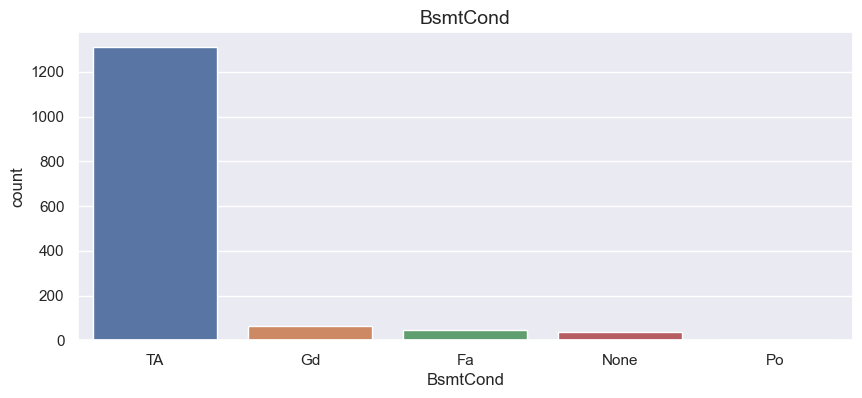

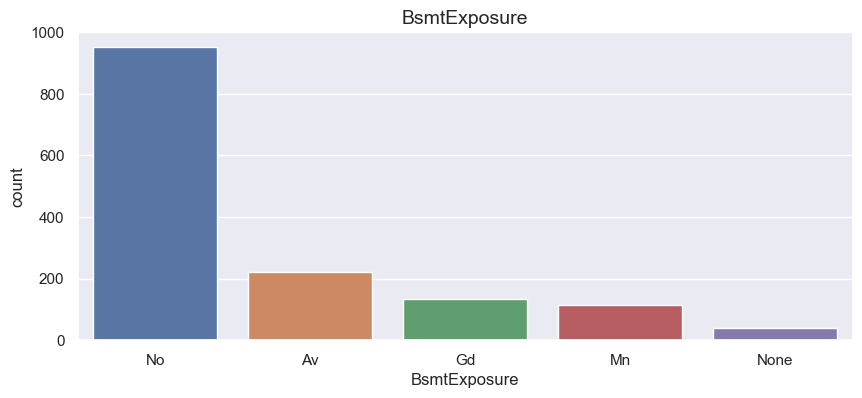

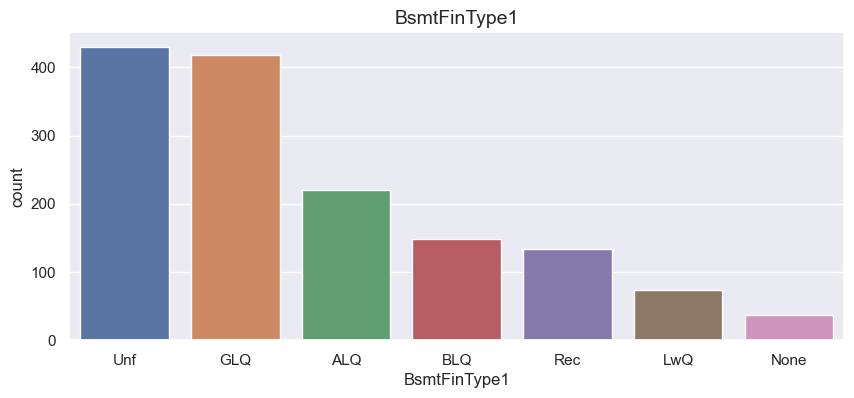

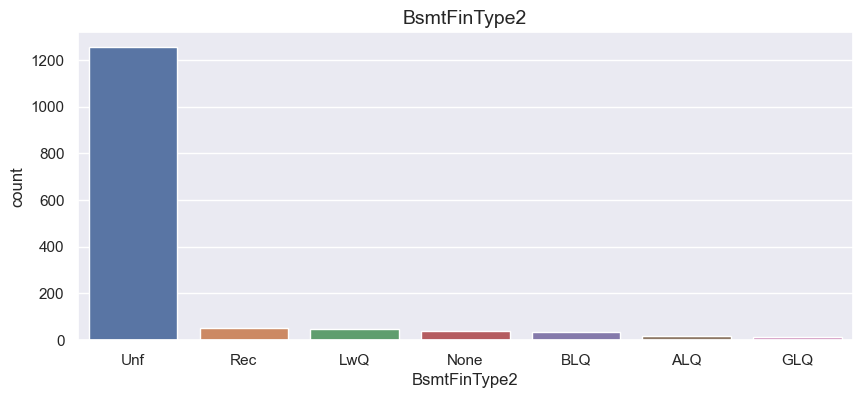

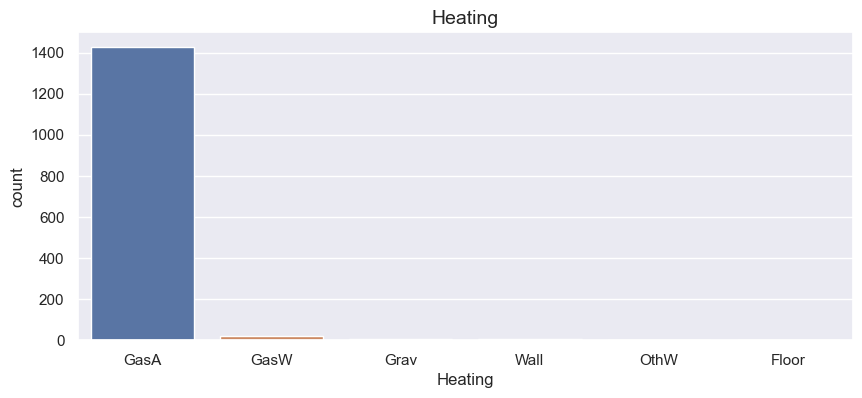

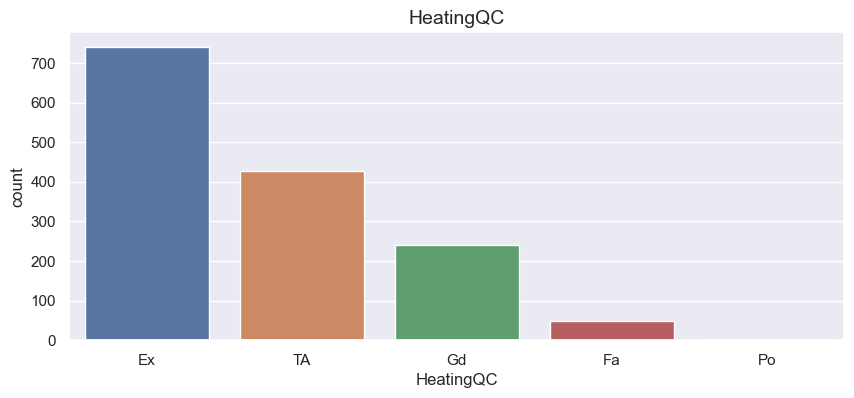

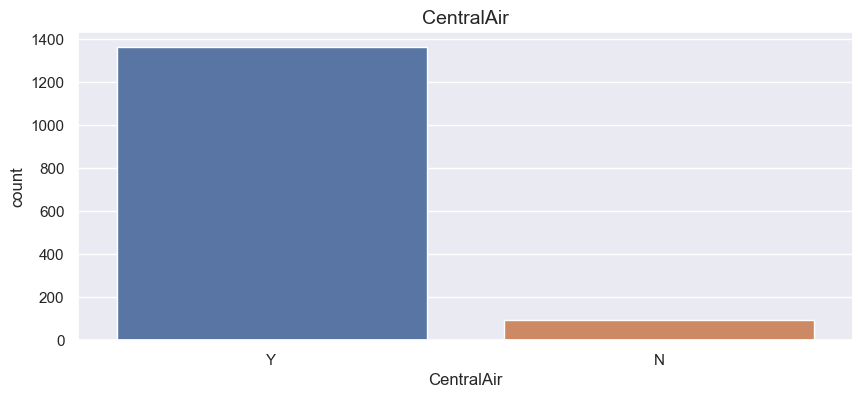

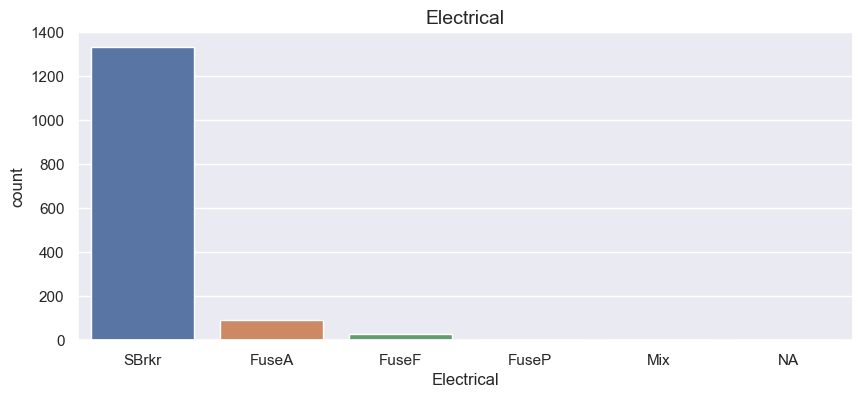

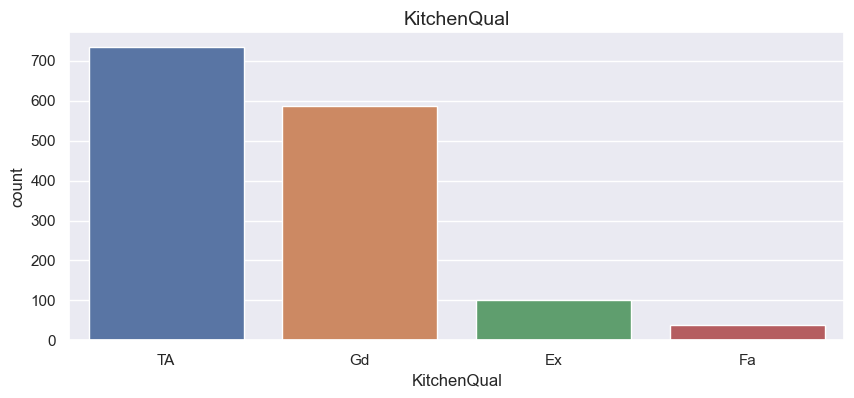

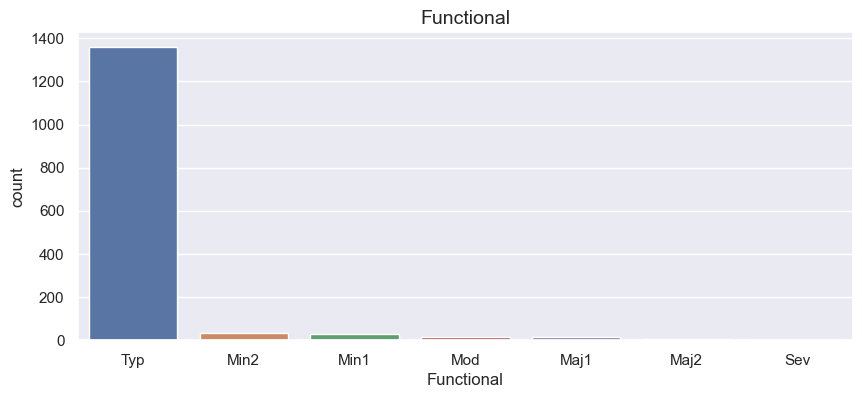

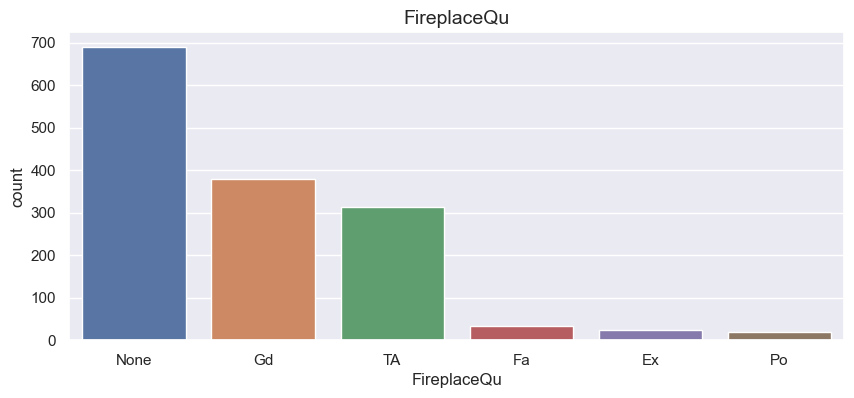

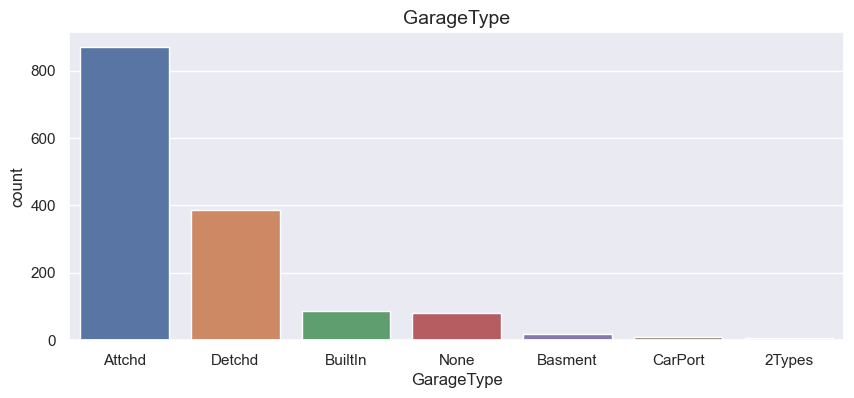

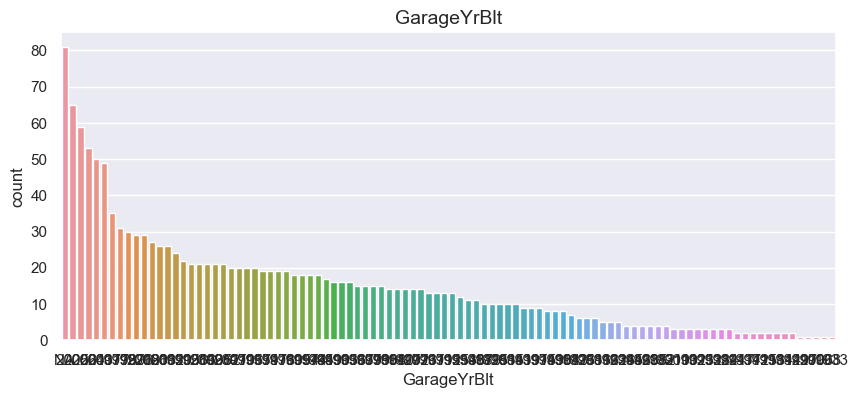

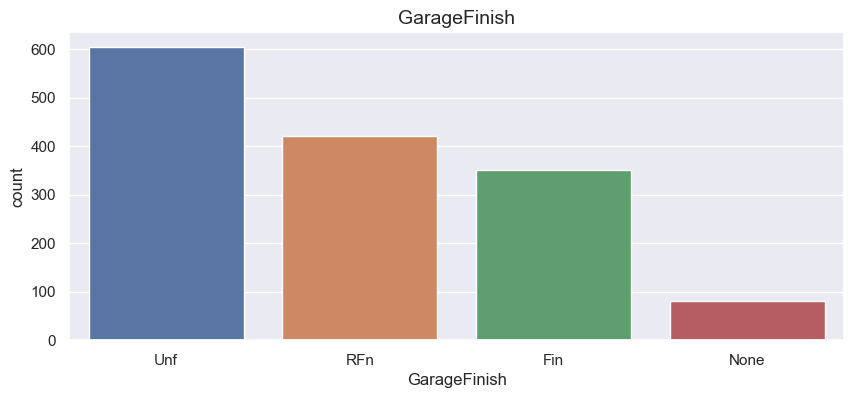

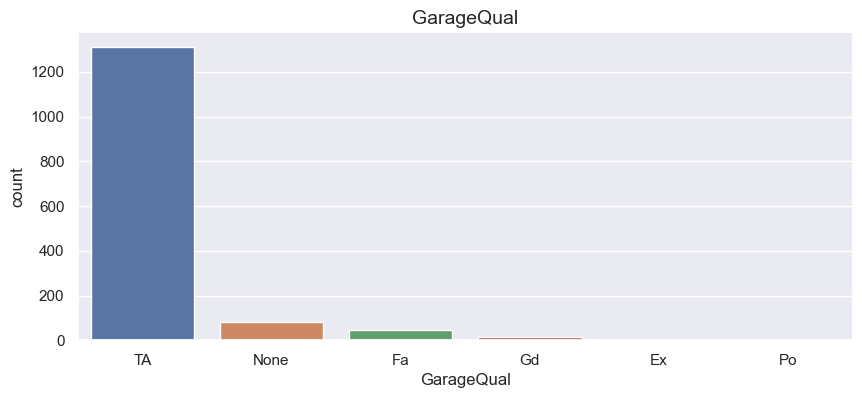

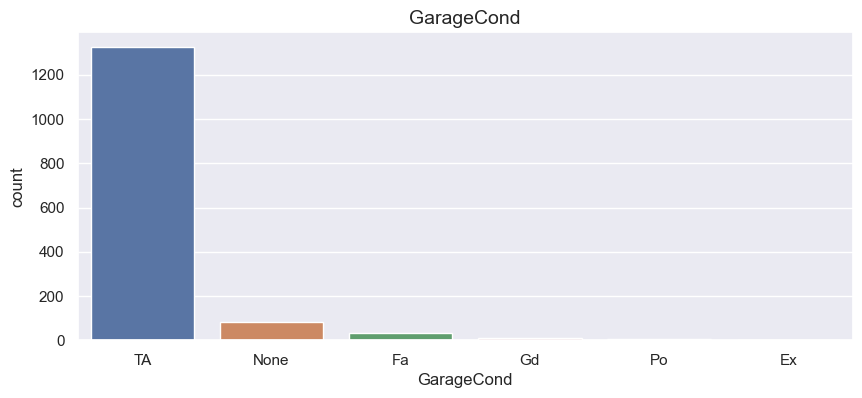

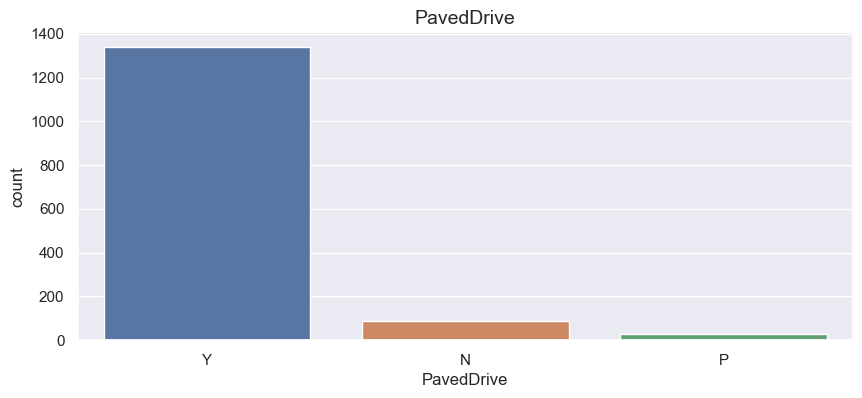

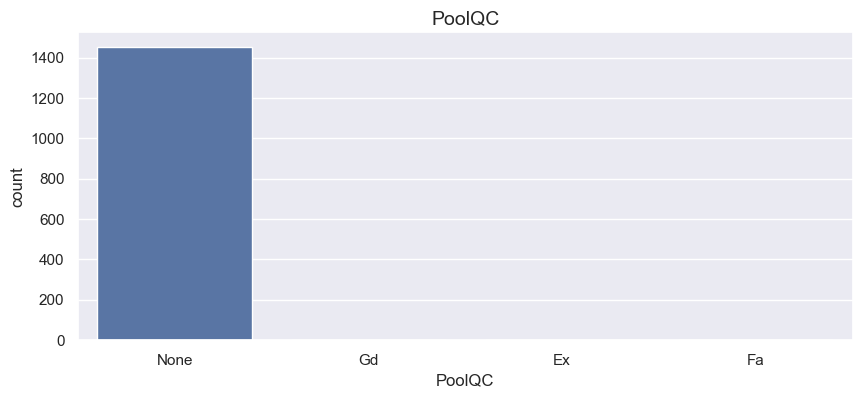

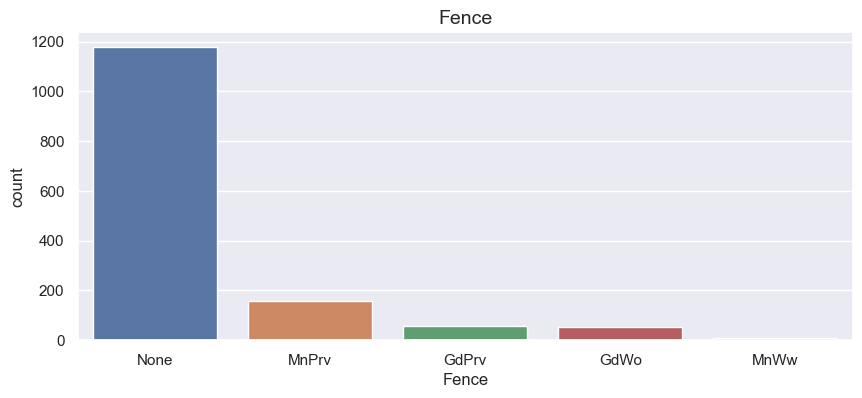

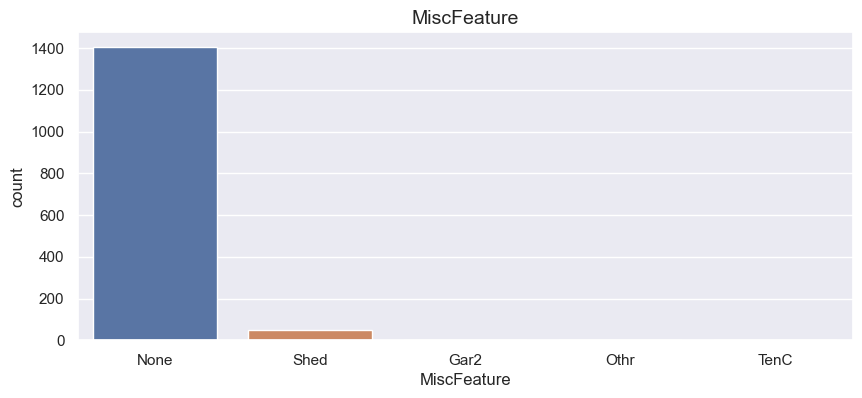

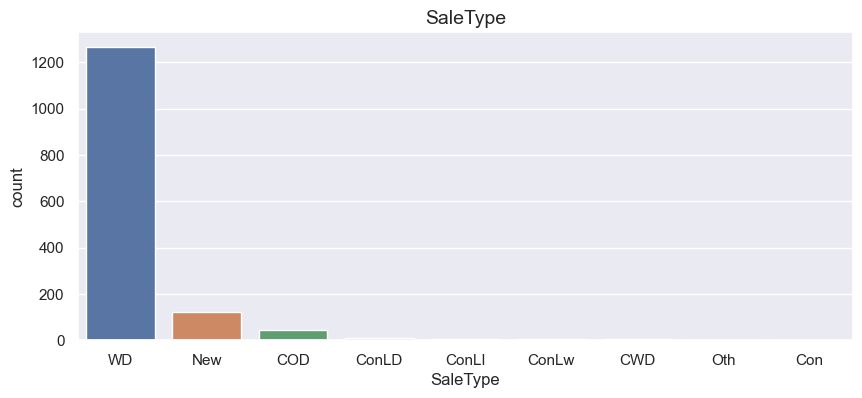

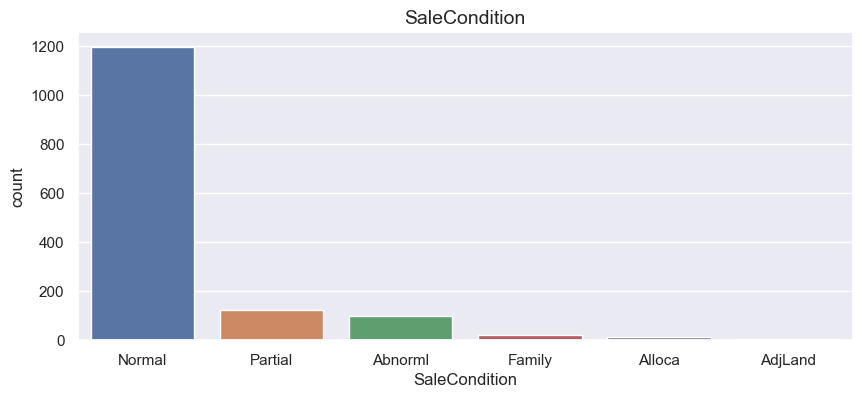

In [90]:
# categorical visualization

for col in df_cat.columns:
    width = 10
    height = 4
    sns.set(rc = {'figure.figsize':(width,height)})
    plt.title(col, fontdict={'fontsize': 14})
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts())
    plt.show()

no unique values which can be removed

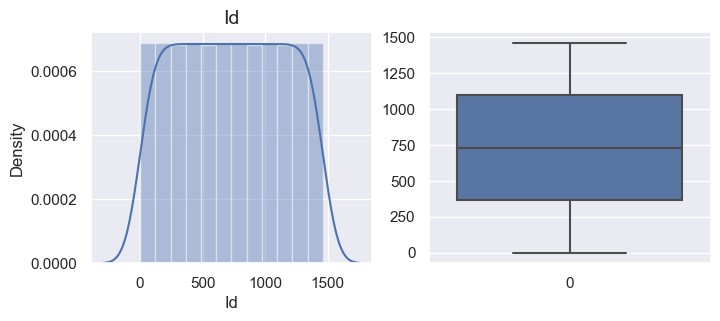

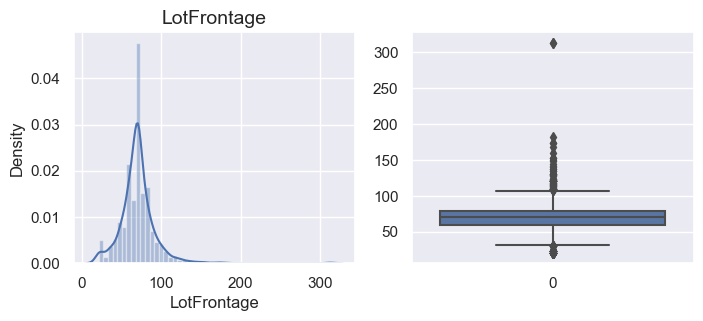

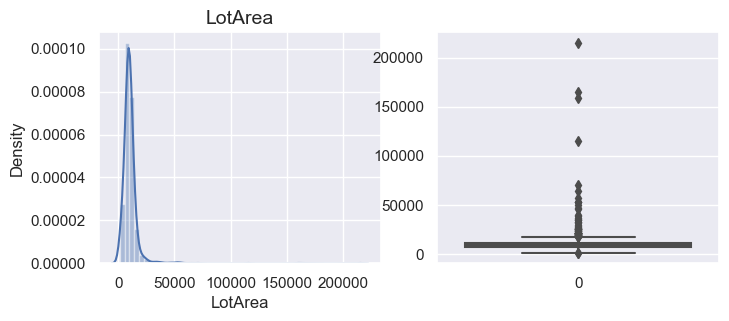

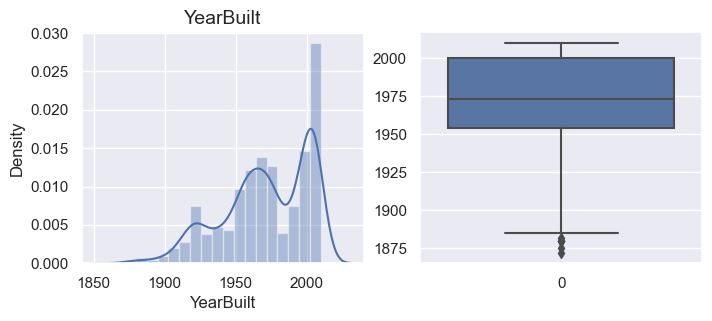

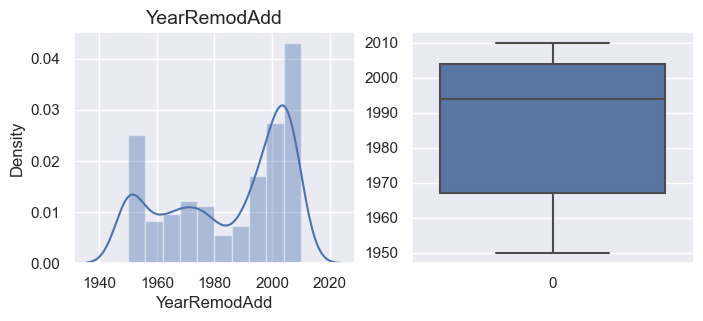

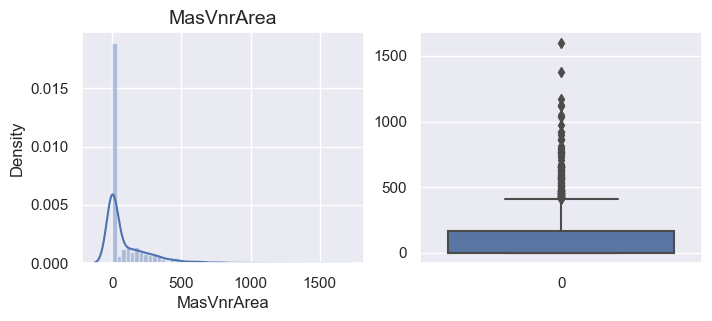

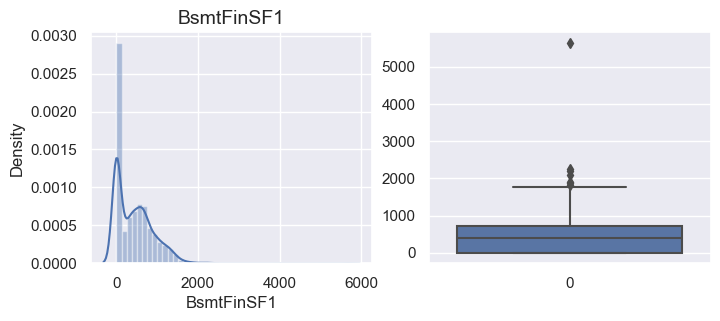

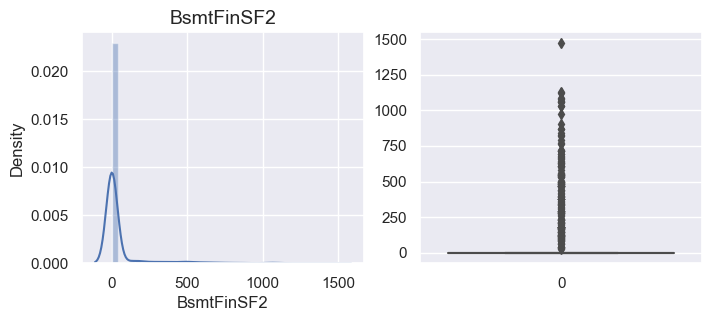

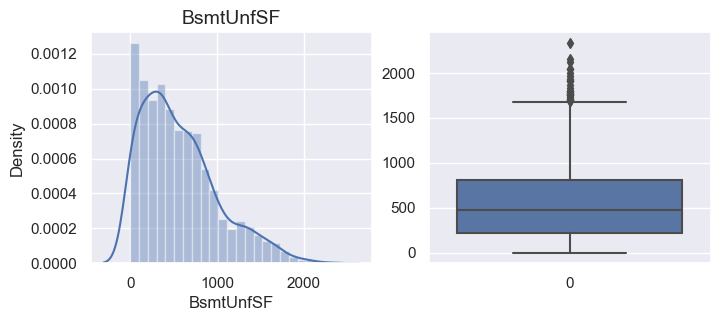

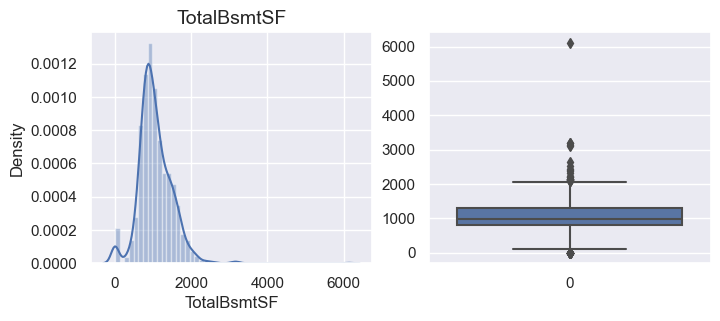

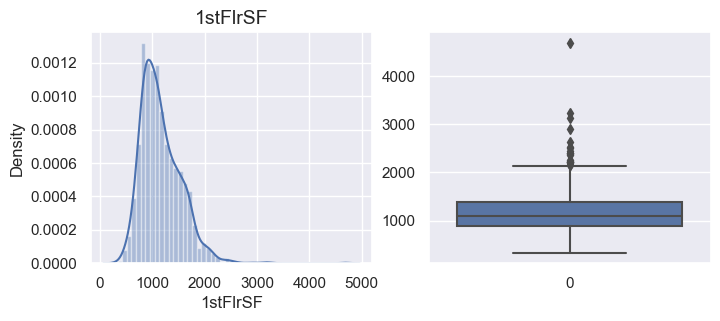

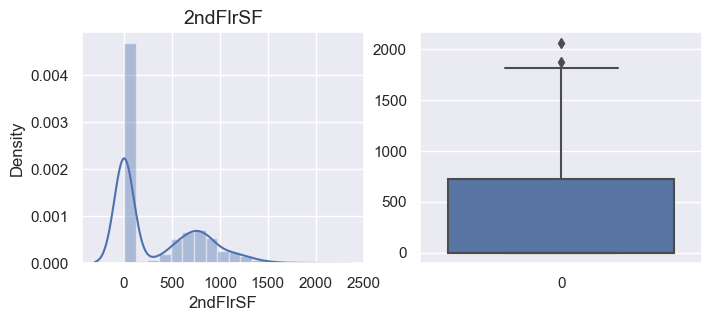

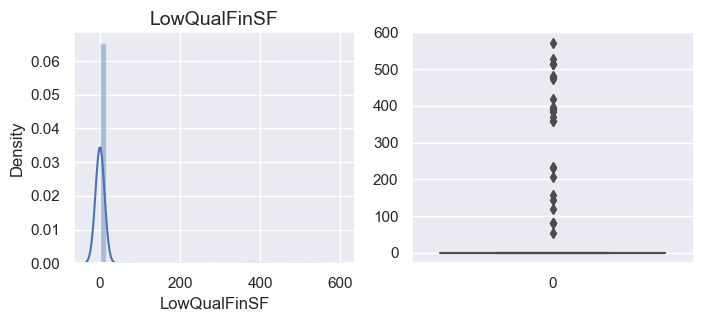

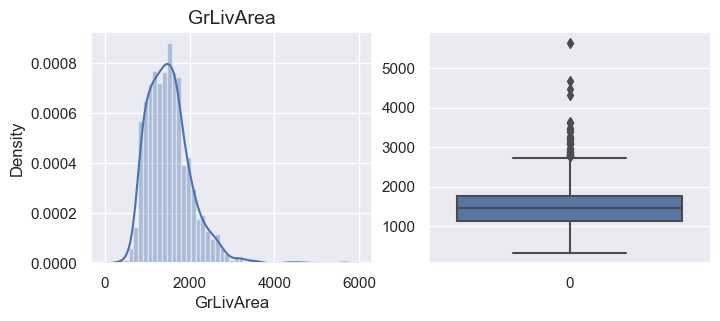

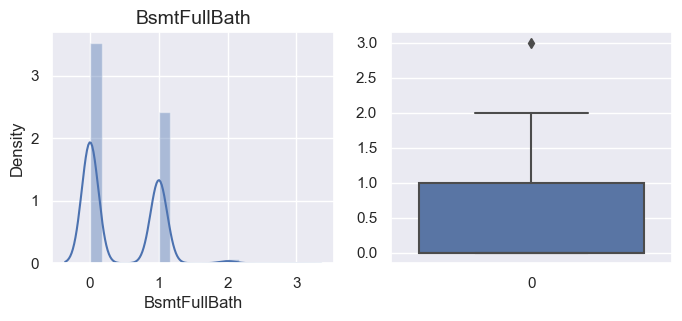

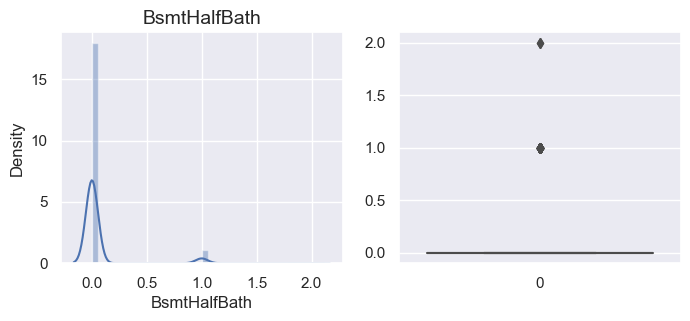

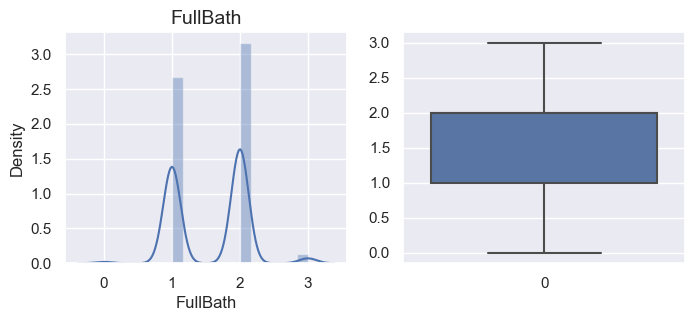

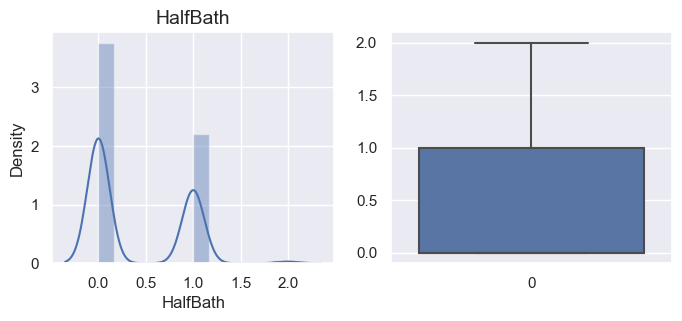

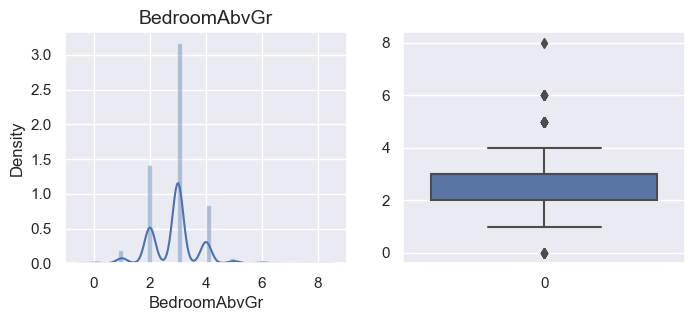

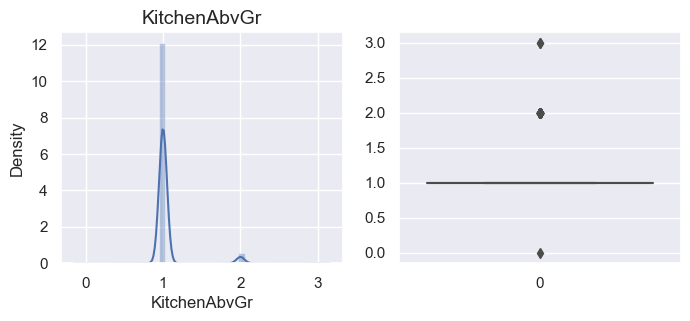

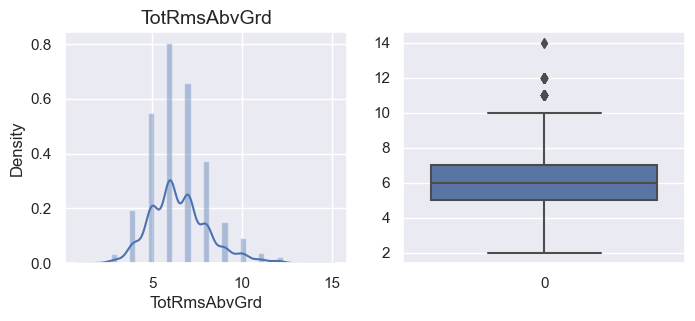

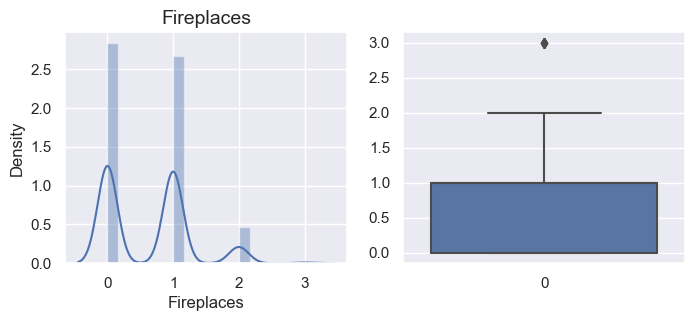

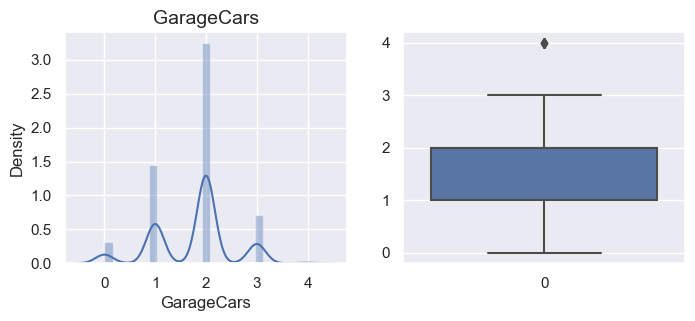

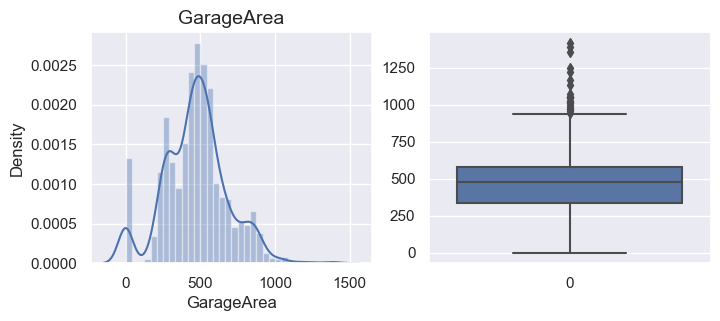

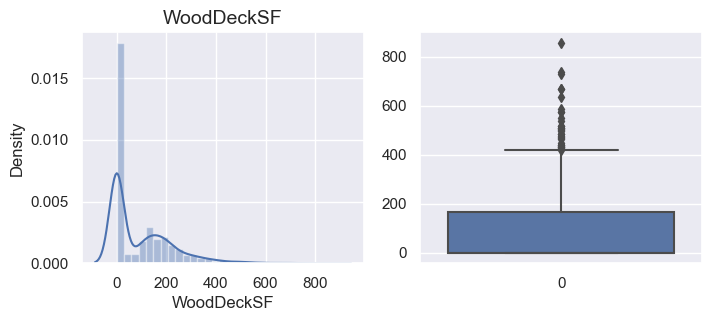

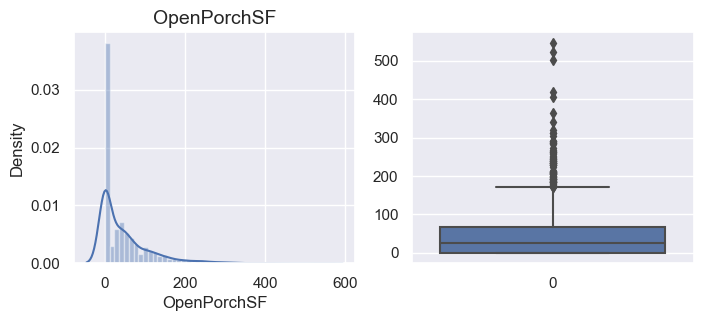

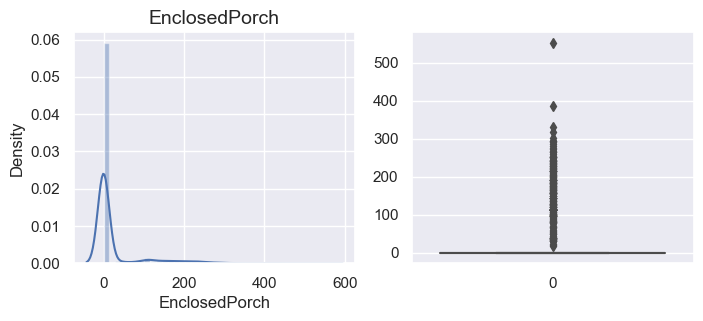

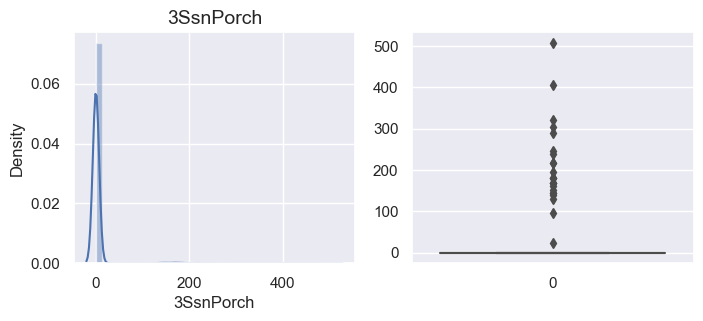

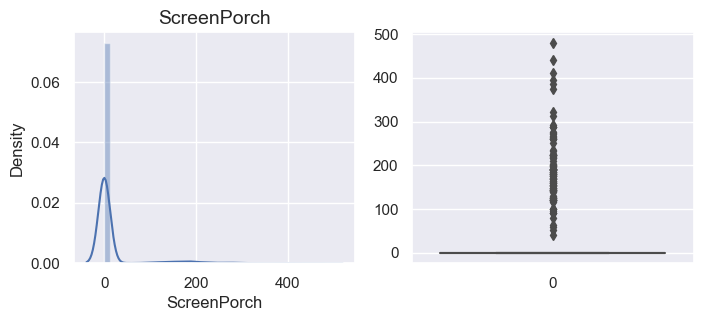

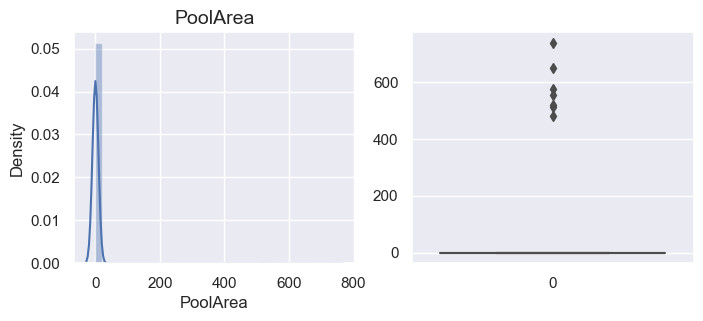

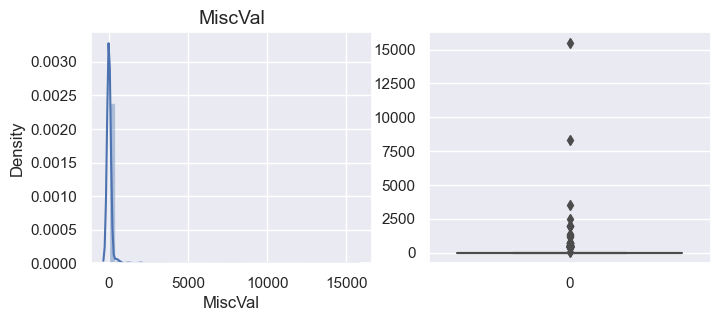

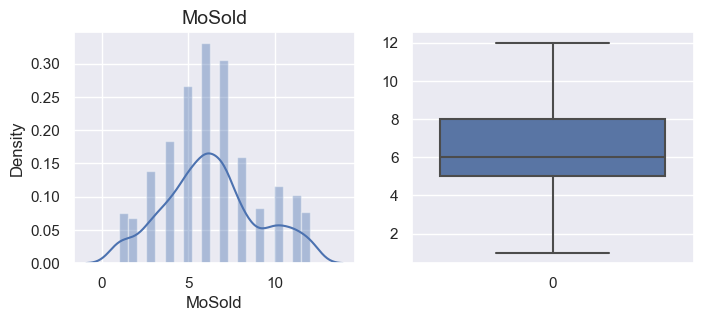

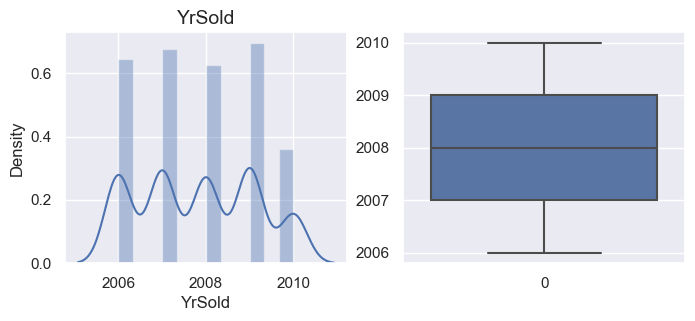

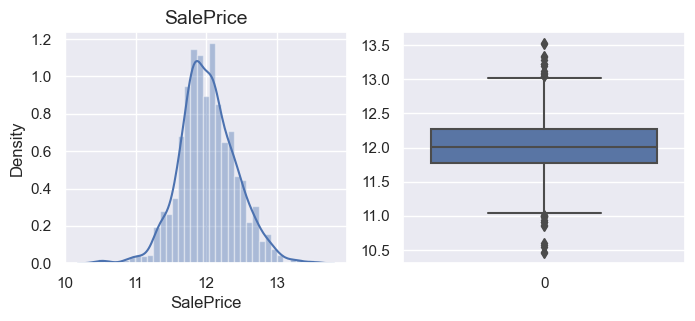

In [91]:
# numerical 

for col in df_num.columns:

    width =8
    height = 3
    sns.set(rc = {'figure.figsize':(width,height)})
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 14})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()    

many of them are missing normal distribution, which means outliers are present.

In [92]:
# bivariate analysis

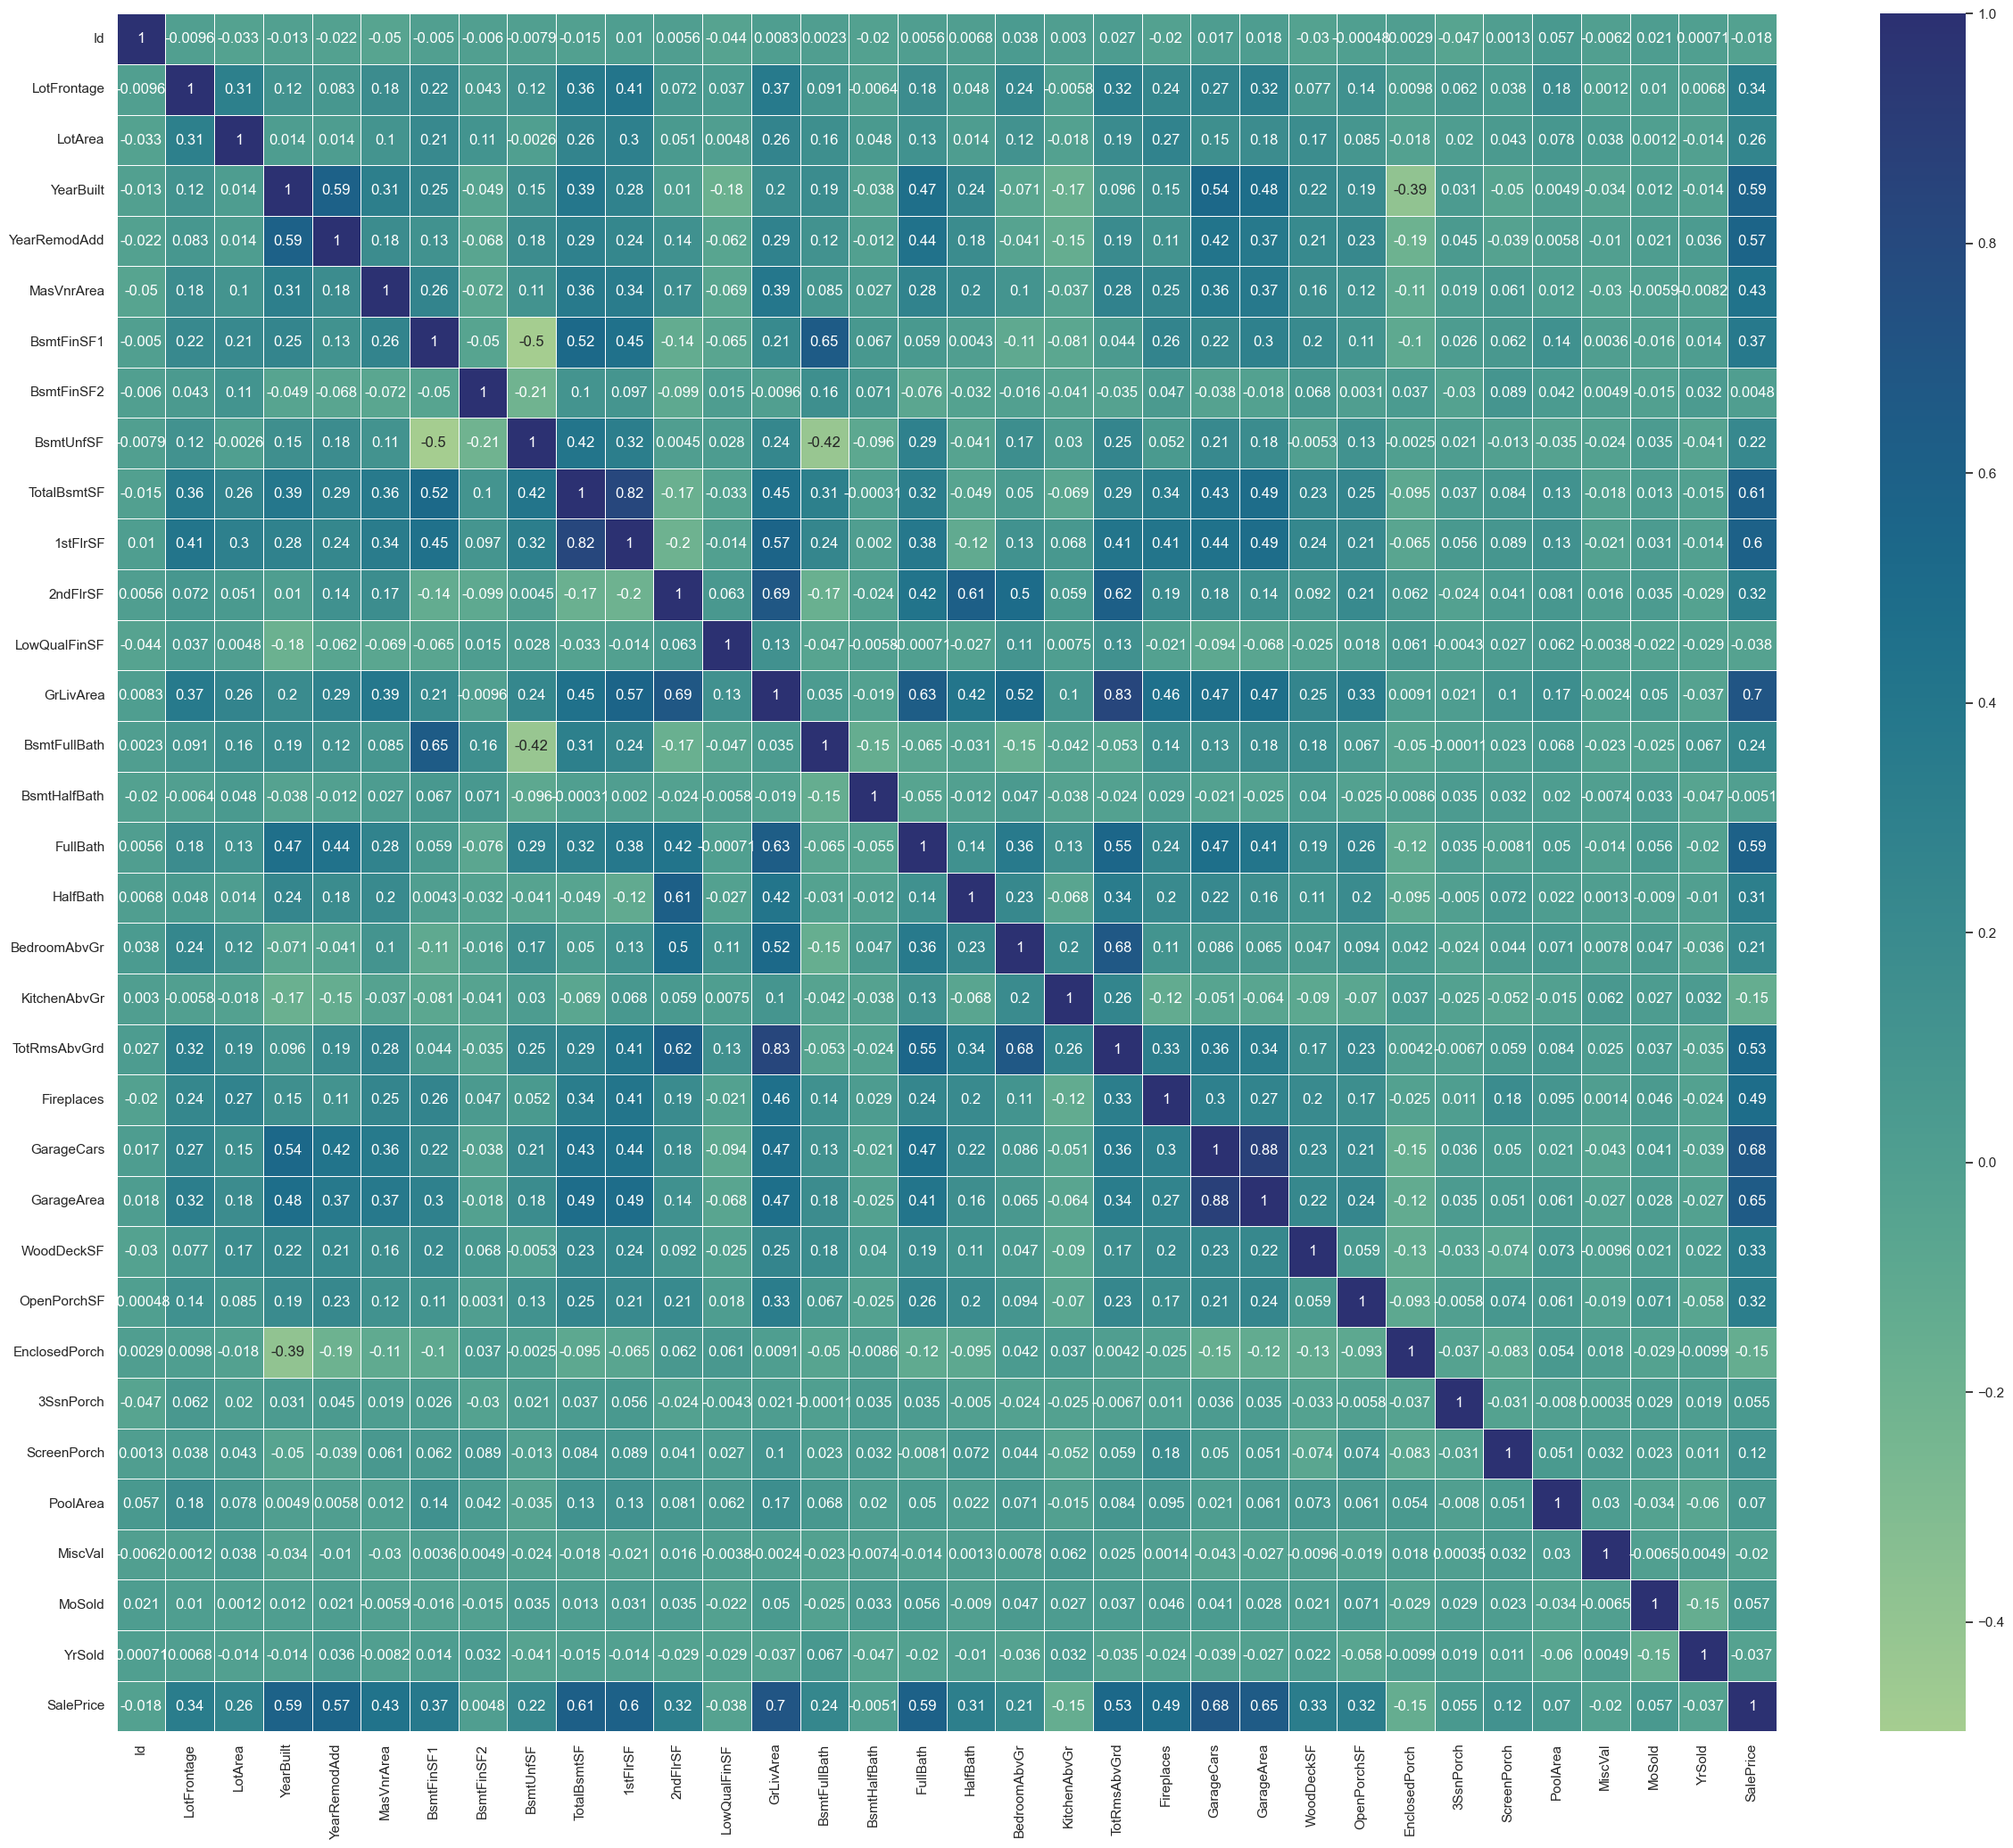

In [93]:
width =30
height = 25
sns.set(rc = {'figure.figsize':(width,height)})
sns.heatmap(df_num.corr(), annot=True, linewidth=.5, cmap="crest");

In [94]:
# create a new variable age of house

df['Age'] = df['YrSold'] - df['YearBuilt']

In [95]:
# let's drop the columns
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [96]:
df.shape

(1460, 80)

In [97]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story           7           5          2003   
1       Norm     1Fam     1Story           6           8          1976   
2       Norm     1Fam     2Story           7           5          2002   
3       Norm     1Fam     2Story           7           5          1970   
4       Norm     1Fam     2Story           8           5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           1          Gd   
4             1          Gd             9  

### Step 5 - Dummmy variable management

In [98]:
# we have to re-separate the categorical and numerical as we created Age and removed two existing columns


In [99]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

In [100]:
df_num.shape

(1460, 33)

In [101]:
df_cat.shape

(1460, 47)

### Step 6 - Outlier treatment

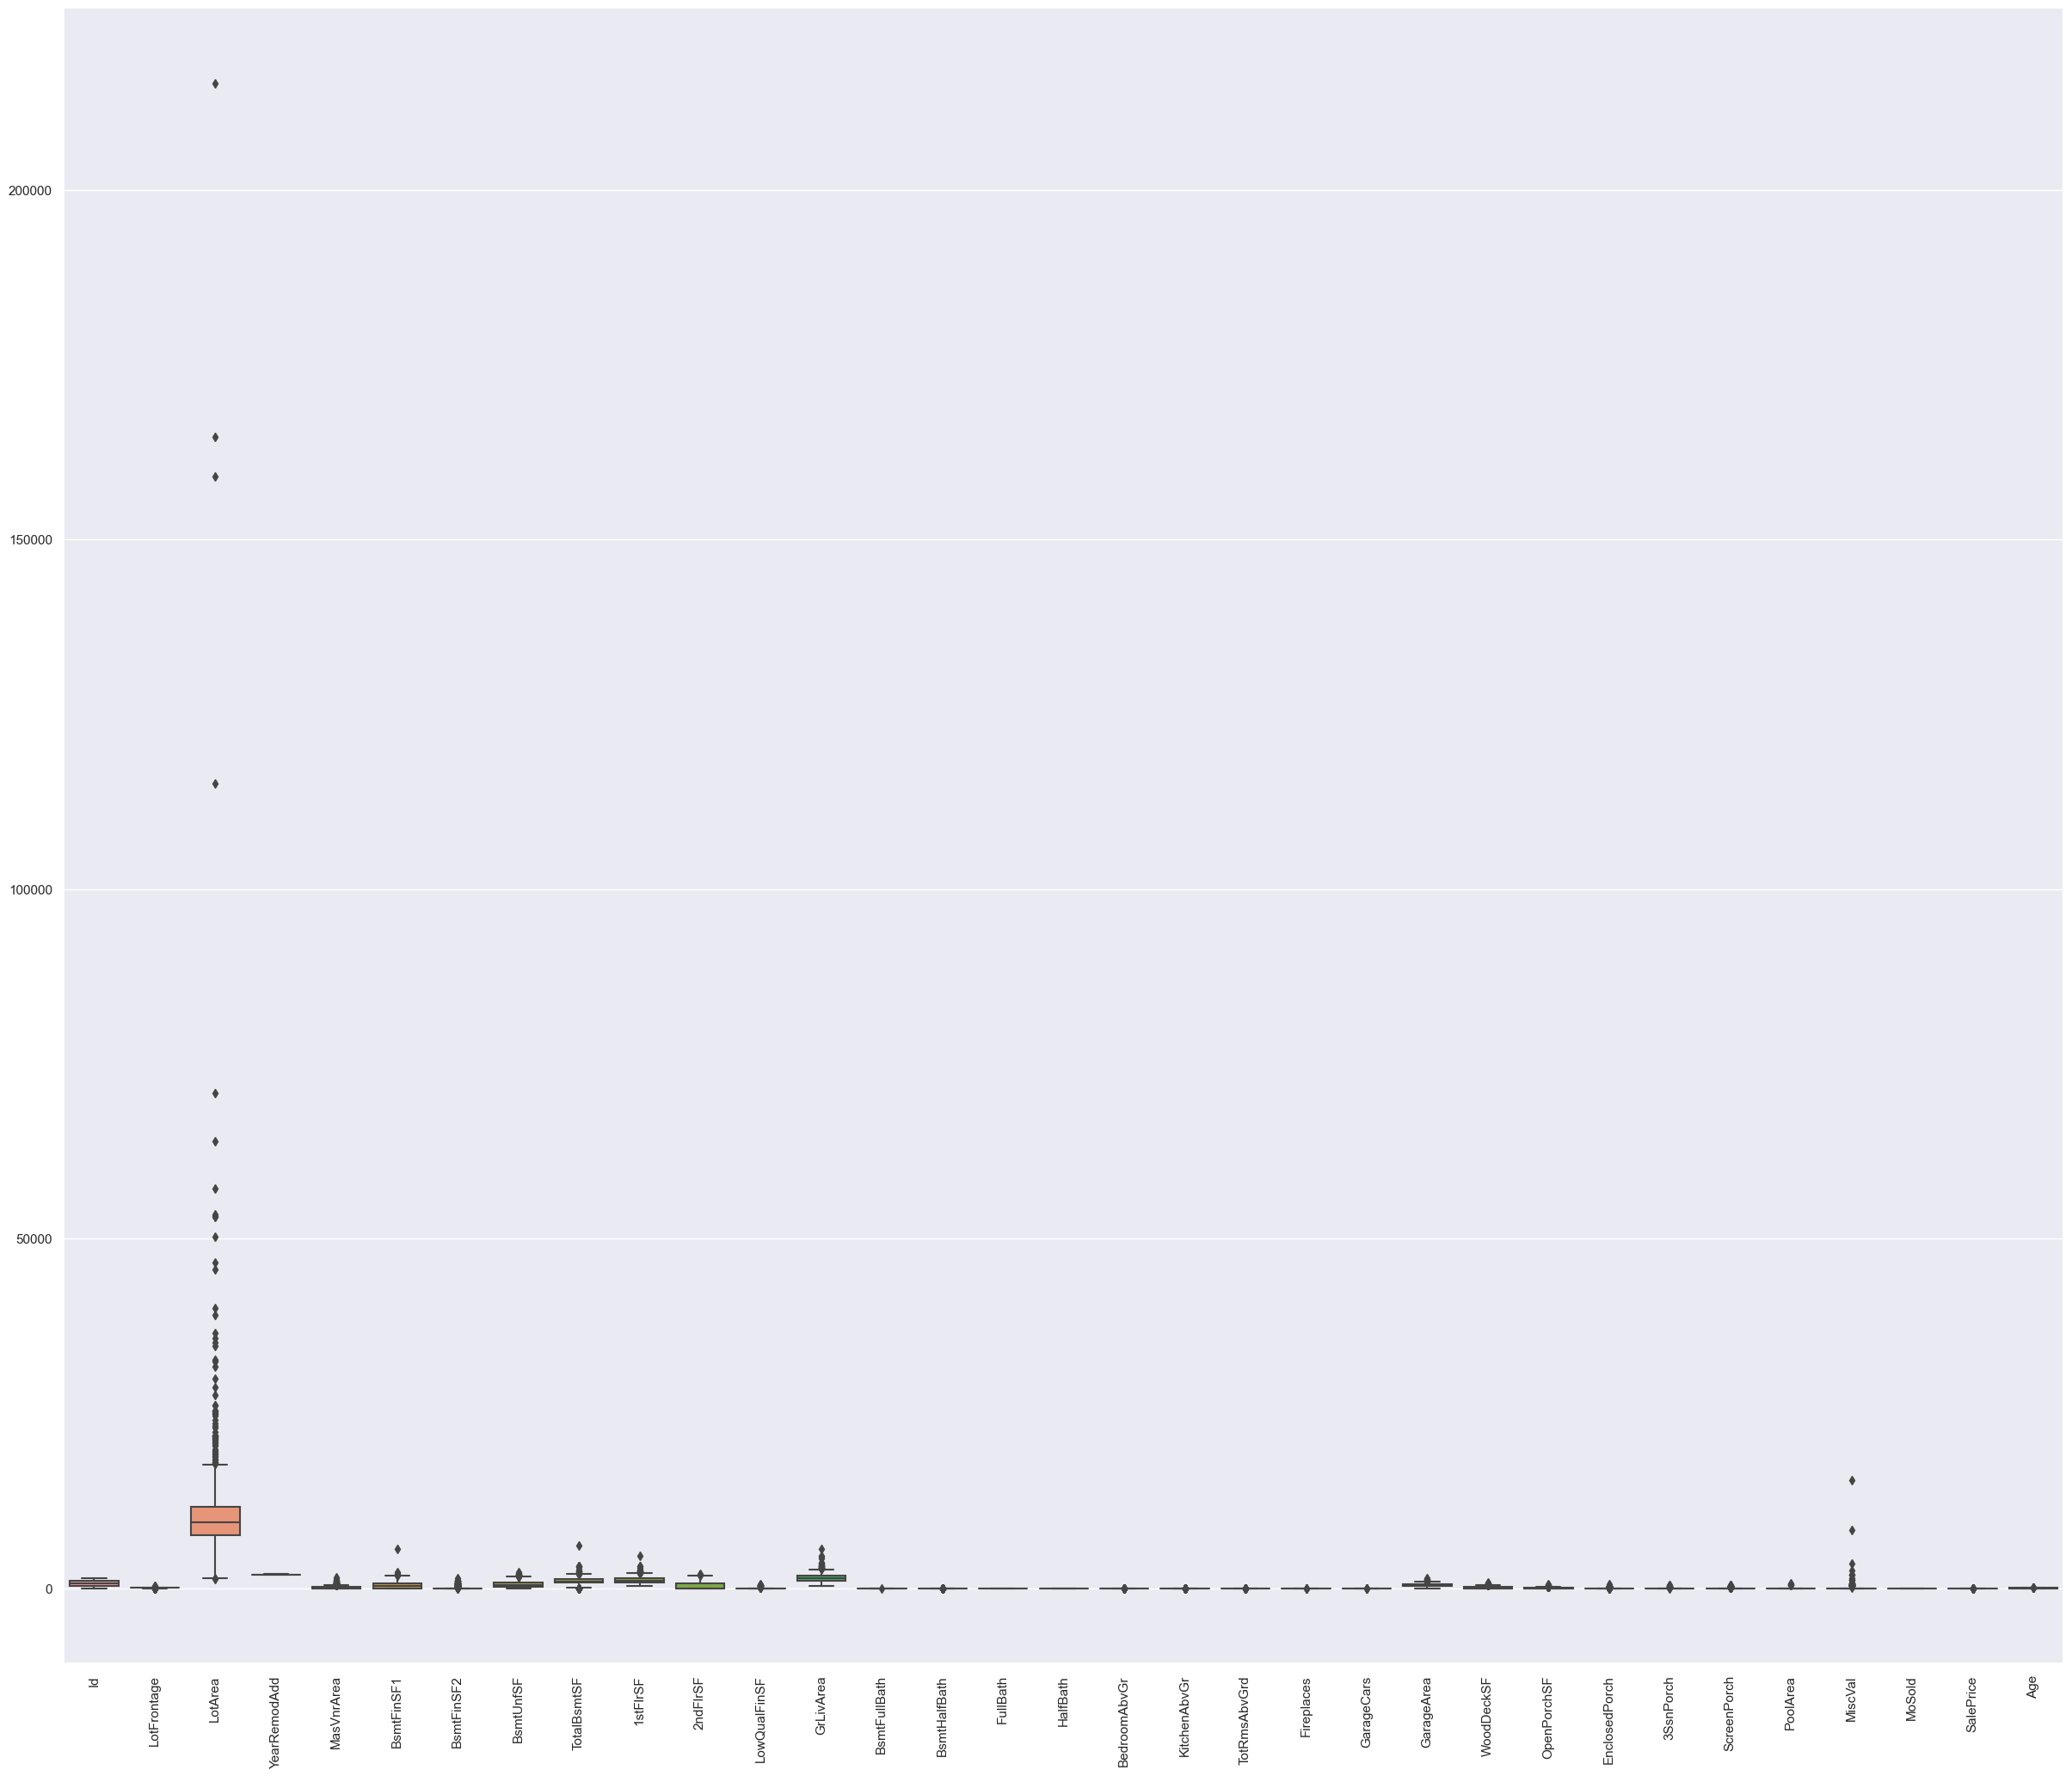

In [102]:
width =15
height = 6
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(width,height)})
sns.boxplot(data=df_num);

In [103]:
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.04)] = df_num[col].quantile(0.04)
    df_num[col][df_num[col] >= df_num[col].quantile(0.96)] = df_num[col].quantile(0.96)

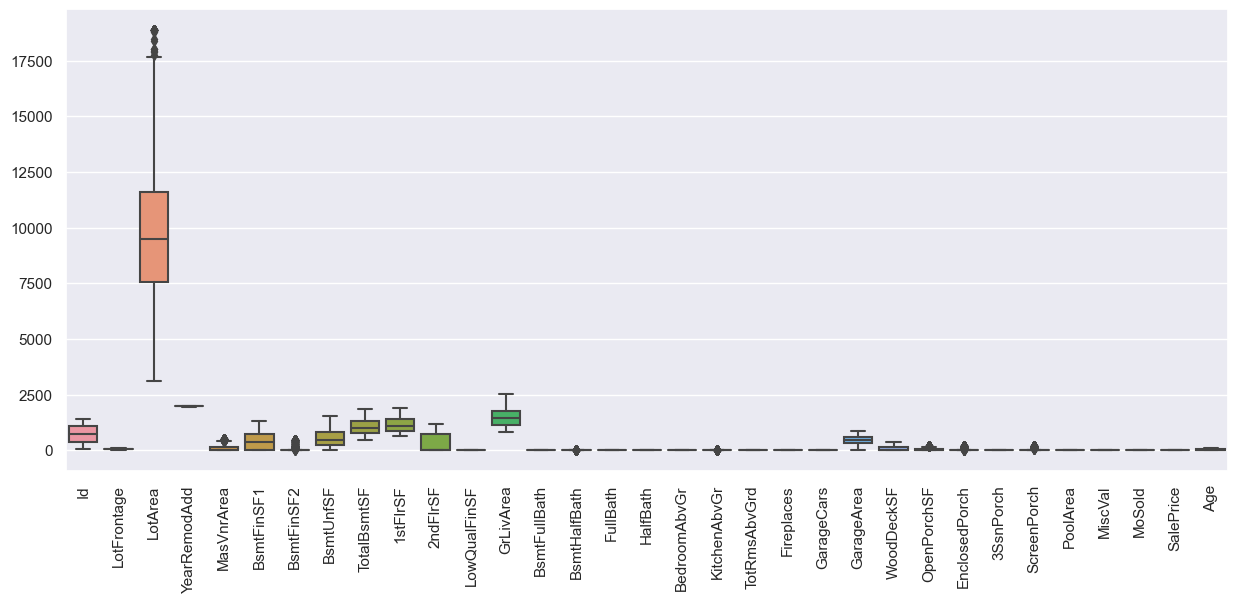

In [104]:
# check visually after outlier treatment

width =15
height = 8
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(width,height)})
sns.boxplot(data=df_num);

### Step 7 - Manage data column

In [105]:
# combine treated outlier data from above step with categorical column

df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df = pd.concat([df_num, df_cat_encoded], axis=1)

In [106]:
df.shape

(1460, 386)

### Step 8 - Data split (Dependant and Independant variable)

In [107]:
df.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0  59.36         65.0   8450.0          2003       196.0         706   
1  59.36         80.0   9600.0          1976         0.0         978   
2  59.36         68.0  11250.0          2002       162.0         486   
3  59.36         60.0   9550.0          1970         0.0         216   
4  59.36         84.0  14260.0          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0      150.0        856.0     856.0     854.0             0   
1         0.0      284.0       1262.0    1262.0       0.0             0   
2         0.0      434.0        920.0     920.0     866.0             0   
3         0.0      540.0        756.0     961.0     756.0             0   
4         0.0      490.0       1145.0    1145.0    1053.0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1710.0             1             0         2         1             3   
1     1262.0             0             1         2         0             3   
2     1786.0             1             0         2         1             3   
3     1717.0             1             0         1         0             3   
4     2198.0             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2       548.0         0.0   
1             1             6           1           2       460.0       298.0   
2             1             6           1           2       608.0         0.0   
3             1             7           1           3       642.0         0.0   
4             1             9           1           3       836.0       192.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0           0.00          0            0         0        0   
1          0.0           0.00          0            0         0        0   
2         42.0           0.00          0            0         0        0   
3         35.0         193.28          0            0         0        0   
4         84.0           0.00          0            0         0        0   

   MoSold  SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0    2.00  12.247694    5          False          False          False   
1    5.00  12.109011   31          False          False          False   
2    9.00  12.317167    7          False          False          False   
3    2.00  11.849398   91          False          False          False   
4   11.64  12.429216    8          False          False          False   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0          False           True          False          False          False   
1          False          False          False          False          False   
2          False           True          False          False          False   
3          False          False           True          False          False   
4          False           True          False          False          False   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0          False          False           False           False   
1          False          False           False           False   
2          False          False           False           False   
3          False          False           False           False   
4          False          False           False           False   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0           False           False        False        False         True   
1           False           False        False        False         True   
2           False           False        False        False         True   
3           False           False        False        False         True   


In [108]:
# droping these columns as not required because of independent variables 
X = df.drop(["Id","SalePrice"], axis=1).copy()


In [109]:
X.head(2)

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0      150.0        856.0     856.0     854.0             0     1710.0   
1      284.0       1262.0    1262.0       0.0             0     1262.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2       548.0         0.0         61.0   
1             6           1           2       460.0       298.0          0.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  Age  \
0            0.0          0            0         0        0     2.0    5   
1            0.0          0            0         0        0     5.0   31   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0          False          False          False          False           True   
1          False          False          False          False          False   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0          False          False          False          False          False   
1          False          False          False          False          False   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0           False           False           False           False   
1           False           False           False           False   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0        False        False         True        False         True   
1        False        False         True        False         True   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0        True       False         False         False          True   
1        True       False         False         False          True   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0            False            False             True             False   
1            False            False             True             False   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0              False          False          False              True   
1              False           True          False             False   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0          False          False                 False                False   
1          False          False                 False                False   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                 False                 False                  True   
1                 False                 False                 False   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                 False                 False                 False   
1                 False                 False                 False   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                False                 False                 False   
1                False                 False                 False   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0               False                 False                False   
1               False                 False                False   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                 False                 False                 False   
1                 False                 False             

In [110]:
# target variable which we want to predict

y = df["SalePrice"].copy()
y.head(2)

0    12.247694
1    12.109011
Name: SalePrice, dtype: float64

### Step 9 - Split into test and train data

In [111]:
# train data is 80% and test data is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [112]:
X_train.shape

(1168, 384)

In [113]:
y_train.shape

(1168,)

In [114]:
X_test.shape

(292, 384)

In [115]:
y_test.shape

(292,)

In [116]:
# numerical columnst o be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
print(num_cols)

['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Age']


In [117]:
scaling = StandardScaler()
X_train[num_cols] = scaling.fit_transform(X_train[num_cols])
X_test[num_cols] = scaling.transform(X_test[num_cols])

### Step 10 - Ridge regression model

In [118]:
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    metric = []
    
    ## Rsquared of train - test data
    print("R-Squared - Train =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared - Test =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of square of train - test data (rss)
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS - Train =", '%.2f' % rss_train)
    print("RSS - Test =", '%.2f' % rss_test)

    ## Mean Square Error of train - test data (mse)
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE - Train =", '%.2f' % mse_train)
    print("MSE - Test =", '%.2f' % mse_test)

    # Root Mean Square Error for train - test data (rmse)
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE - Train =", '%.2f' % rmse_train) 
    print("RMSE - Test =", '%.2f' % rmse_test) 
    

    return metric

In [119]:
# ridge regression model


parameters = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 1500]}

ridge = Ridge()

# cross validation

cross_validation = GridSearchCV(estimator = ridge, 
                        param_grid = parameters, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
cross_validation.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [120]:
# will find the optimum value of alpha
cross_validation.best_params_

{'alpha': 9.0}

In [121]:
# now we know that minimum value of alpha is 9, lets create ridge regression instance
ridge = Ridge(alpha=9.0)
ridge.fit(X_train, y_train)

Ridge(alpha=9.0)

In [122]:
# let's predict
y_train_predict = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [123]:
# time to check metrics
ridge_metrics = show_metrics(y_train, y_train_predict, y_test, y_pred)

R-Squared - Train = 0.94
R-Squared - Test = 0.93
RSS - Train = 8.60
RSS - Test = 3.03
MSE - Train = 0.01
MSE - Test = 0.01
RMSE - Train = 0.09
RMSE - Test = 0.10


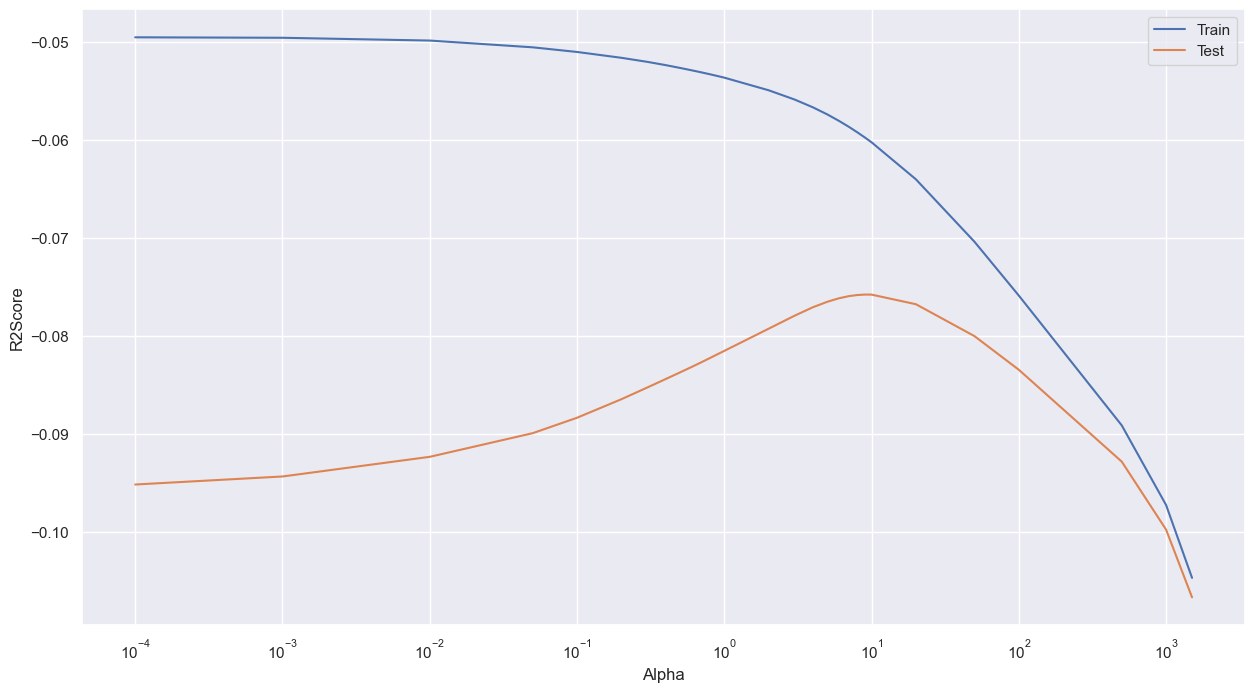

In [124]:
# create a visualization of alpha vs r2score

ridge_result_df = pd.DataFrame(cross_validation.cv_results_)

plt.plot(ridge_result_df['param_alpha'], ridge_result_df['mean_train_score'], label='Train')
plt.plot(ridge_result_df['param_alpha'], ridge_result_df['mean_test_score'], label='Test')
plt.xlabel('Alpha')
plt.ylabel('R2Score')
plt.xscale('log')
plt.legend()
plt.show()

- we can visually notice that as Alpha increases train error decreases
- optimal value of alpha is close to 9

### Step 11 - Lasso regression model

In [125]:
# lasso regression model

parameters = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 1500]}

lasso = Lasso()

# cross validation

lasso_validation = GridSearchCV(estimator = lasso, 
                        param_grid = parameters, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lasso_validation.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [126]:
# will find the optimum value of alpha
lasso_validation.best_params_

{'alpha': 0.001}

In [127]:
# cross validation search result

lasso_validation.cv_results_

{'mean_fit_time': array([0.31304808, 0.11870284, 0.04669828, 0.04026299, 0.03669682,
        0.03093328, 0.03309212, 0.03025136, 0.02971478, 0.02966561,
        0.02906027, 0.02790737, 0.03192873, 0.03413944, 0.03359795,
        0.03056269, 0.02980871, 0.02792706, 0.03256521, 0.0313139 ,
        0.03026237, 0.02823553, 0.03364968, 0.03068495, 0.03128581,
        0.02930961, 0.03169971, 0.03045063, 0.0279211 ]),
 'std_fit_time': array([0.06355353, 0.04434075, 0.00256666, 0.0046133 , 0.00436349,
        0.00138056, 0.00876084, 0.00276156, 0.00309444, 0.00414557,
        0.00087669, 0.00175913, 0.00558015, 0.00651155, 0.00321663,
        0.004452  , 0.0032137 , 0.00261418, 0.00380577, 0.0040843 ,
        0.00277997, 0.00092632, 0.00485483, 0.00192758, 0.00267297,
        0.00337717, 0.00513118, 0.00515427, 0.00790424]),
 'mean_score_time': array([0.00925903, 0.01009083, 0.00912781, 0.00959749, 0.00924082,
        0.00885348, 0.00692892, 0.00738444, 0.00790806, 0.01109543,
        0.007585

From above two steps we know now the value of Alpha = 0.001

In [128]:
# lasso model

lasso_alpha = Lasso(alpha=0.001)
lasso_alpha.fit(X_train, y_train)

Lasso(alpha=0.001)

In [129]:
# let's make predictions

y_train_pred = lasso_alpha.predict(X_train)
y_pred = lasso_alpha.predict(X_test)
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared - Train = 0.92
R-Squared - Test = 0.93
RSS - Train = 11.40
RSS - Test = 3.03
MSE - Train = 0.01
MSE - Test = 0.01
RMSE - Train = 0.10
RMSE - Test = 0.10


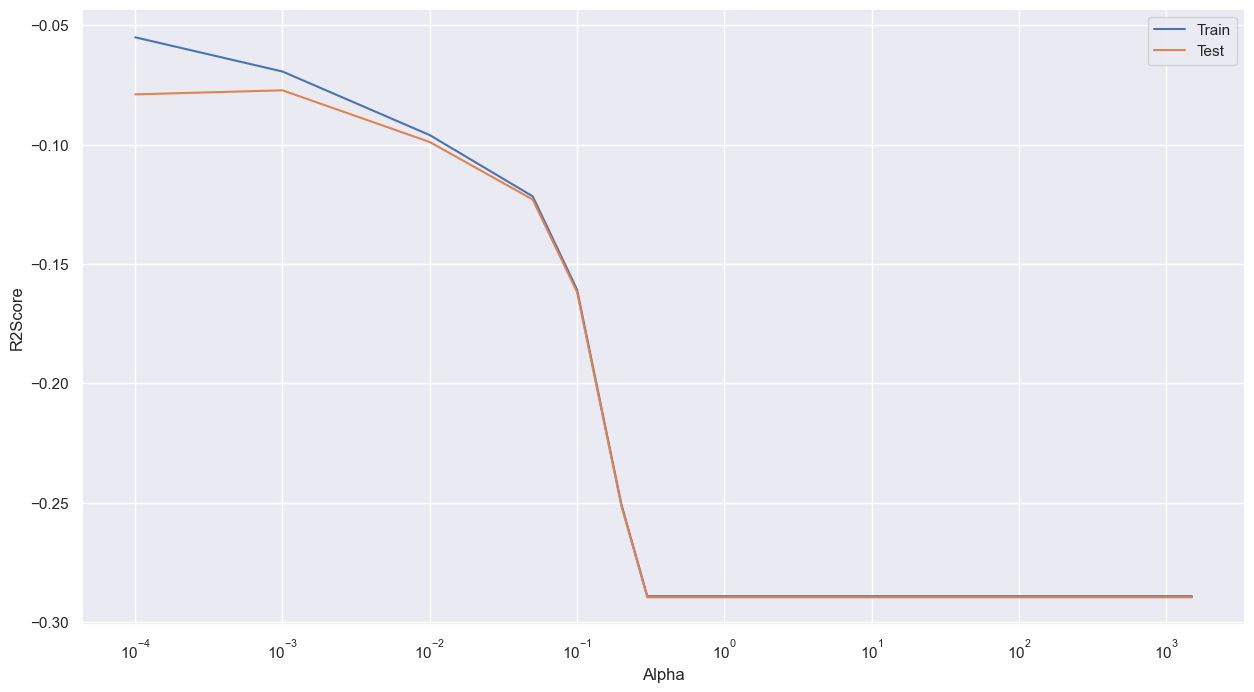

In [130]:
# create a visualization of alpha vs r2score

lasso_result_df= pd.DataFrame(lasso_validation.cv_results_)

plt.plot(lasso_result_df['param_alpha'], lasso_result_df['mean_train_score'], label='Train')
plt.plot(lasso_result_df['param_alpha'], lasso_result_df['mean_test_score'], label='Test')
plt.xlabel('Alpha')
plt.ylabel('R2Score')
plt.xscale('log')
plt.legend()
plt.show()

- as seen from the above graph notice that as  the Alpha value increases their is a decrease in train & test error. 

### Step 12 - Comparision of model based on step 8 & Step 9 (above two models)

In [131]:
two_model_table = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

compare_table = pd.DataFrame(two_model_table, columns = ['Metrics', 'Ridge Regression', 'Lasso Regression'])
compare_table.set_index('Metrics')

Ridge Regression  Lasso Regression
Metrics                                             
R2 Score (Train)          0.942131          0.923227
R2 Score (Test)           0.925799          0.925862
RSS (Train)               8.595835         11.403855
RSS (Test)                3.031573          3.029016
MSE (Train)               0.007359          0.009764
MSE (Test)                0.010382          0.010373
RMSE (Train)              0.085787          0.098811
RMSE (Test)               0.101893          0.101850

if we notice R2 Score (Test) than it is 0.925 for Lasso & Ridge regression

In [132]:
# let's find the features selected and removed by lasso

In [133]:
# blank dataframe with independent variables
blank_df = pd.DataFrame(index=X.columns)
blank_df.rows = X.columns

In [134]:
blank_df.shape

(384, 0)

In [135]:
# now let's fill in the data in blank dataframe created above for both the models

blank_df['Lasso Model'] = lasso_alpha.coef_
blank_df['Ridge Model'] = ridge.coef_


In [136]:
blank_df.head()

Lasso Model  Ridge Model
LotFrontage      0.002890     0.005964
LotArea          0.019507     0.018719
YearRemodAdd     0.028650     0.024618
MasVnrArea      -0.000000    -0.001921
BsmtFinSF1       0.020609     0.006359

In [137]:
blank_df.shape

(384, 2)

In [138]:
# features removed

removed_features = blank_df[blank_df['Lasso Model']==0]
removed_features.head()

Lasso Model  Ridge Model
MasVnrArea           -0.0    -0.001921
BsmtFinSF2            0.0    -0.001662
1stFlrSF              0.0     0.008781
LowQualFinSF          0.0     0.000000
BsmtHalfBath          0.0    -0.000128

In [139]:
removed_features.shape

(306, 2)

- 306 out of 384 features are removed from X_train using Lasso feature selection

In [140]:
# features selected

selected_features = blank_df.loc[blank_df['Lasso Model']!=0, 'Lasso Model']
selected_features.head()

LotFrontage     0.002890
LotArea         0.019507
YearRemodAdd    0.028650
BsmtFinSF1      0.020609
BsmtUnfSF      -0.005423
Name: Lasso Model, dtype: float64

In [141]:
selected_features.shape

(78,)

### Step 13 - Findings on data based on above steps

In [142]:
# top 15 selected coefficients are (from ridge)

blank_df['Ridge Model'].sort_values(ascending=False)[:15]

GrLivArea               0.090202
OverallQual_9           0.086177
OverallCond_9           0.079326
OverallQual_8           0.077076
Neighborhood_Crawfor    0.075995
SaleCondition_Alloca    0.074258
Functional_Typ          0.069404
Exterior1st_BrkFace     0.067818
TotalBsmtSF             0.057943
CentralAir_Y            0.054500
Neighborhood_StoneBr    0.053163
BsmtCond_Gd             0.048494
OverallCond_7           0.047235
Neighborhood_NridgHt    0.044293
OverallCond_8           0.043978
Name: Ridge Model, dtype: float64

In [143]:
# top 15 selected coefficients are (from lasso)

blank_df['Lasso Model'].sort_values(ascending=False)[:15]

OverallQual_9           0.128770
GrLivArea               0.112571
OverallQual_8           0.099153
Neighborhood_Crawfor    0.084948
Functional_Typ          0.078773
Exterior1st_BrkFace     0.076044
TotalBsmtSF             0.049727
OverallCond_9           0.045156
Neighborhood_Somerst    0.042279
Condition1_Norm         0.040092
CentralAir_Y            0.039301
OverallQual_7           0.034491
Neighborhood_NridgHt    0.031238
YearRemodAdd            0.028650
OverallCond_7           0.027134
Name: Lasso Model, dtype: float64

Based on the extracted list of 15 varialbles from Lasso and Ridge
Some of the variables that impact the price of house are :-

- GrLivArea
- OverallQual_9
- OverallCond_9
- OverallQual_8
- Neighbourhood_Crawfor
- Functional_Typ
- Exterior1st_BrkFace
- SaleCondition_Alloca
- CentralAir_Y
- TotalBsmtSF
- Neighborhood_Somerst

----------------------------------------------------------------------------------------

- Value of lambda for Ridge Regression = 9.0
- Value of lambda for Lasso Regression = 0.001

--------------------------- Code Ends -------------------------------

## <font color="grey">Answers to subjective question</font>

#### question 1

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

In [144]:
# for above question let's double the alpha values for both the models

ridge_double = Ridge(alpha=18)
ridge_double.fit(X_train, y_train)

Ridge(alpha=18)

In [145]:
# let's make predictions 

y_train_predict = ridge_double.predict(X_train)
y_pred = ridge_double.predict(X_test)
ridge_double_metrics = show_metrics(y_train, y_train_predict, y_test, y_pred)

R-Squared - Train = 0.94
R-Squared - Test = 0.93
RSS - Train = 9.40
RSS - Test = 2.98
MSE - Train = 0.01
MSE - Test = 0.01
RMSE - Train = 0.09
RMSE - Test = 0.10


In [146]:
# Now let's do the same with Lasso model ie; double the value of Alpha

lasso_double = Lasso(alpha=0.0018)
lasso_double.fit(X_train, y_train)

Lasso(alpha=0.0018)

In [147]:
# let's make predictions

y_train_predict = lasso_double.predict(X_train)
y_pred = lasso_double.predict(X_test)
lasso_double_metrics = show_metrics(y_train, y_train_predict, y_test, y_pred)

R-Squared - Train = 0.91
R-Squared - Test = 0.92
RSS - Train = 13.29
RSS - Test = 3.47
MSE - Train = 0.01
MSE - Test = 0.01
RMSE - Train = 0.11
RMSE - Test = 0.11


* we notice that their are no change in Ridge regression metrics after doubling :-

    Previous 
    * R-Squared - Train = 0.94
    * R-Squared - Test = 0.93

    After Double
    * R-Squared - Train = 0.94
    * R-Squared - Test = 0.93

-------------

* we notice that their are changes in Lasso regression metrics after doubling :-

      Previous 
    * R-Squared - Train = 0.92
    * R-Squared - Test = 0.93

    After Double
    * R-Squared - Train = 0.91
    * R-Squared - Test = 0.92

In [148]:
betas_double = pd.DataFrame(index=X.columns)
betas_double.rows = X.columns
betas_double.head()

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1]

In [149]:
betas_double.shape

(384, 0)

In [150]:
betas_double['Ridge Model'] = ridge.coef_
betas_double['Lasso Model'] = ridge.coef_

In [151]:
betas_double['Ridge Model'].sort_values(ascending=False)[:15]

GrLivArea               0.090202
OverallQual_9           0.086177
OverallCond_9           0.079326
OverallQual_8           0.077076
Neighborhood_Crawfor    0.075995
SaleCondition_Alloca    0.074258
Functional_Typ          0.069404
Exterior1st_BrkFace     0.067818
TotalBsmtSF             0.057943
CentralAir_Y            0.054500
Neighborhood_StoneBr    0.053163
BsmtCond_Gd             0.048494
OverallCond_7           0.047235
Neighborhood_NridgHt    0.044293
OverallCond_8           0.043978
Name: Ridge Model, dtype: float64

In [152]:
betas_double['Lasso Model'].sort_values(ascending=False)[:15]

GrLivArea               0.090202
OverallQual_9           0.086177
OverallCond_9           0.079326
OverallQual_8           0.077076
Neighborhood_Crawfor    0.075995
SaleCondition_Alloca    0.074258
Functional_Typ          0.069404
Exterior1st_BrkFace     0.067818
TotalBsmtSF             0.057943
CentralAir_Y            0.054500
Neighborhood_StoneBr    0.053163
BsmtCond_Gd             0.048494
OverallCond_7           0.047235
Neighborhood_NridgHt    0.044293
OverallCond_8           0.043978
Name: Lasso Model, dtype: float64

So variables are doubling the values of Alpha are :-

- GrLivArea               
- OverallQual_9           
- OverallCond_9           
- OverallQual_8           
- Neighborhood_Crawfor    
- SaleCondition_Alloca    
- Functional_Typ          
- Exterior1st_BrkFace     
- TotalBsmtSF             
- CentralAir_Y       

#### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [153]:
# let's drop the top 5 variables. We can pick top 5 from the above steps and drop them from train and test

variable__topfive = ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'Exterior1st_BrkFace']
X_train_dropped = X_train.drop(variable__topfive, axis=1)
X_test_dropped = X_test.drop(variable__topfive, axis=1)

In [154]:
# lasso regression model

parameters = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 1500]}

lasso_alpha_m = Lasso()

# cross validation

lasso_validation = GridSearchCV(estimator = lasso, 
                        param_grid = parameters, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lasso_validation.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [155]:
# so optimal value of Alpha after dropping top 5 variables are :- 

lasso_validation.best_params_

{'alpha': 0.001}

In [156]:
lasso_alpha_m = Lasso(alpha=0.001)

In [157]:
lasso_alpha_m.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [158]:
y_train_pred = lasso_alpha_m.predict(X_train_dropped)
y_pred = lasso_alpha_m.predict(X_test_dropped)

In [159]:
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared - Train = 0.91
R-Squared - Test = 0.92
RSS - Train = 12.83
RSS - Test = 3.20
MSE - Train = 0.01
MSE - Test = 0.01
RMSE - Train = 0.10
RMSE - Test = 0.10


In [160]:
# Lasso model




In [161]:
lasso_metrics_table = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lasso_metrics_table, columns = ['Metrics', 'Lasso Regression'] )
final_metric.set_index('Metrics')

Lasso Regression
Metrics                           
R2 Score (Train)          0.913648
R2 Score (Test)           0.921713
RSS (Train)              12.826628
RSS (Test)                3.198525
MSE (Train)               0.010982
MSE (Test)                0.010954
RMSE (Train)              0.104794
RMSE (Test)               0.104661

In [162]:
# let's find the variable 

empty_df = pd.DataFrame(index=X_train_dropped.columns)
empty_df.rows = X_train_dropped.columns
empty_df

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, ...]

In [163]:
empty_df['Lasso Regression'] = lasso_alpha_m.coef_

In [164]:
empty_df.head()

Lasso Regression
LotFrontage           0.002602
LotArea               0.019658
YearRemodAdd          0.025679
MasVnrArea           -0.000000
BsmtFinSF1            0.023302

In [165]:
empty_df['Lasso Regression'].sort_values(ascending=False)[:5]

2ndFlrSF                0.098781
1stFlrSF                0.079284
Functional_Typ          0.078766
Neighborhood_Somerst    0.060289
TotalBsmtSF             0.053112
Name: Lasso Regression, dtype: float64

---------------------------   Subjective question answer ends -------------------------